In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [3]:
df=pd.read_csv('dataset_target.csv',index_col=0)

In [6]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

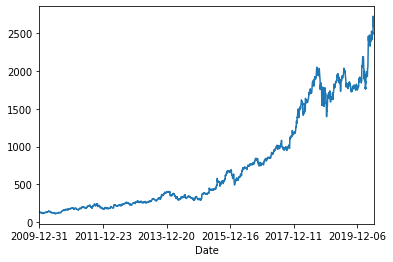

In [7]:
df['High'].plot()

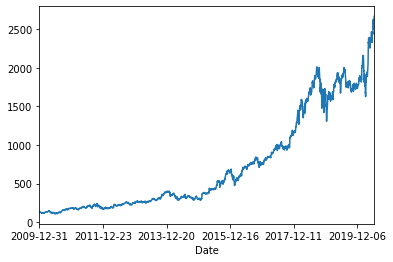

In [8]:
df['Low'].plot()

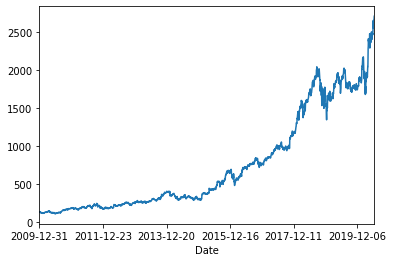

In [10]:
df['Adj Close'].plot()

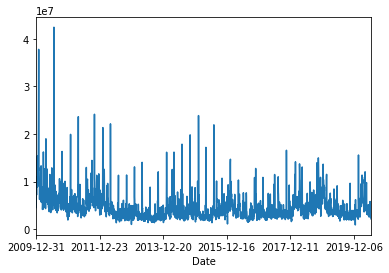

In [11]:
df['Volume'].plot()

##### Entering moving Average

In [12]:
## We are taking 50 moving average
## That is a total of 50 days data

In [13]:
df['Moving_av']= df['Adj Close'].rolling(window=50,min_periods=0).mean()

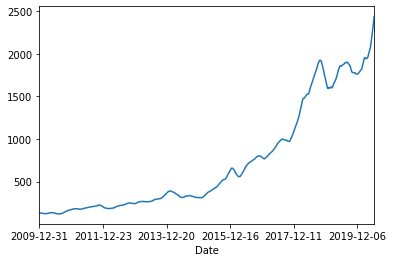

In [14]:
df['Moving_av'].plot()

In [15]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]


while i<len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume']-df.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close']-df.iloc[i-1]['Adj Close'])
    i+=1
    
df['Increase_in_vol']=rate_increase_in_vol
df['Increase_in_adj_close']=rate_increase_in_adj_close    

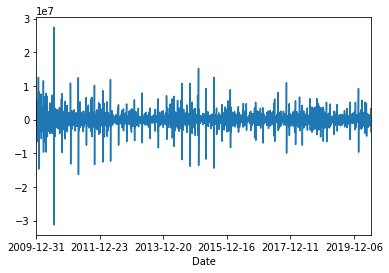

In [16]:
df['Increase_in_vol'].plot()

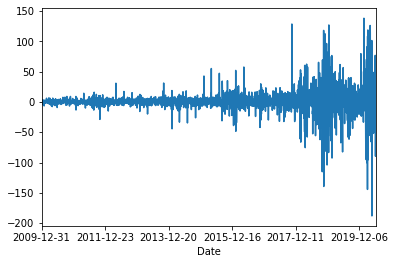

In [17]:
df['Increase_in_adj_close'].plot()

In [18]:
df.to_csv("dataset_target_2.csv",index=False)

In [19]:
df.columns


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close'],
      dtype='object')

In [20]:
df=pd.read_csv('stock_details/AMZN.csv')

In [21]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [24]:
Dates=[]
i=0
while i<len(df):
		Dates.append(df.iloc[i]['Date'])
		i+=1

In [25]:
df2=pd.read_csv('dataset_target_2.csv')
df2['Date']=Dates
df2.to_csv("dataset_target_2.csv",index=False)

In [26]:
df=pd.read_csv('Dataset_main.csv')

In [27]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'MMM',
       ...
       'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'Date'],
      dtype='object', length=207)

In [36]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
df=pd.read_csv('stock_details/AMZN.csv',index_col=0,parse_dates=True)

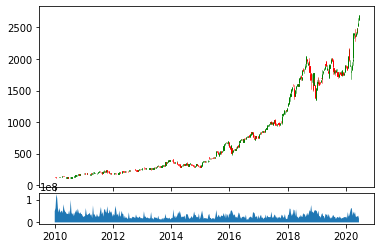

In [37]:
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)



ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

### Dataset Preprocessing

In [196]:
df1=pd.read_csv('dataset_target.csv')
col1=df1.columns
print(col1)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [197]:
df2=pd.read_csv('dataset_target_2.csv')
col2=df2.columns
print(col2)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'Date'],
      dtype='object')


In [198]:
df3=pd.read_csv('Dataset_main.csv')
col3=df3.columns
print(col3)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'MMM',
       ...
       'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'Date'],
      dtype='object', length=207)


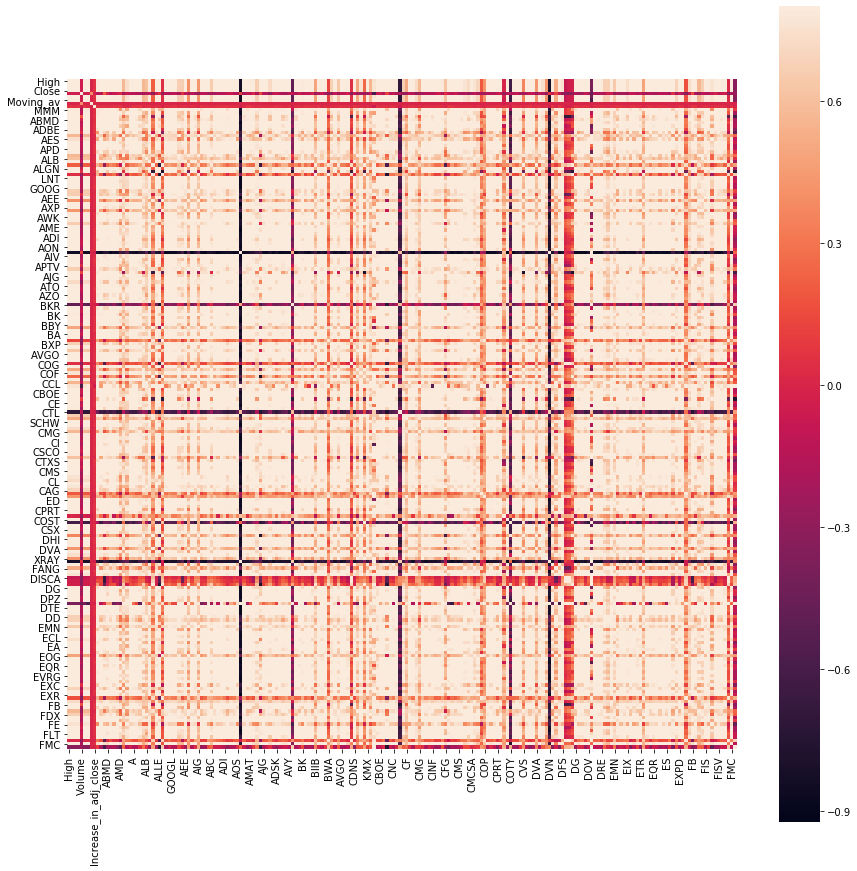

In [199]:
import seaborn as sb
C_mat = df3.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

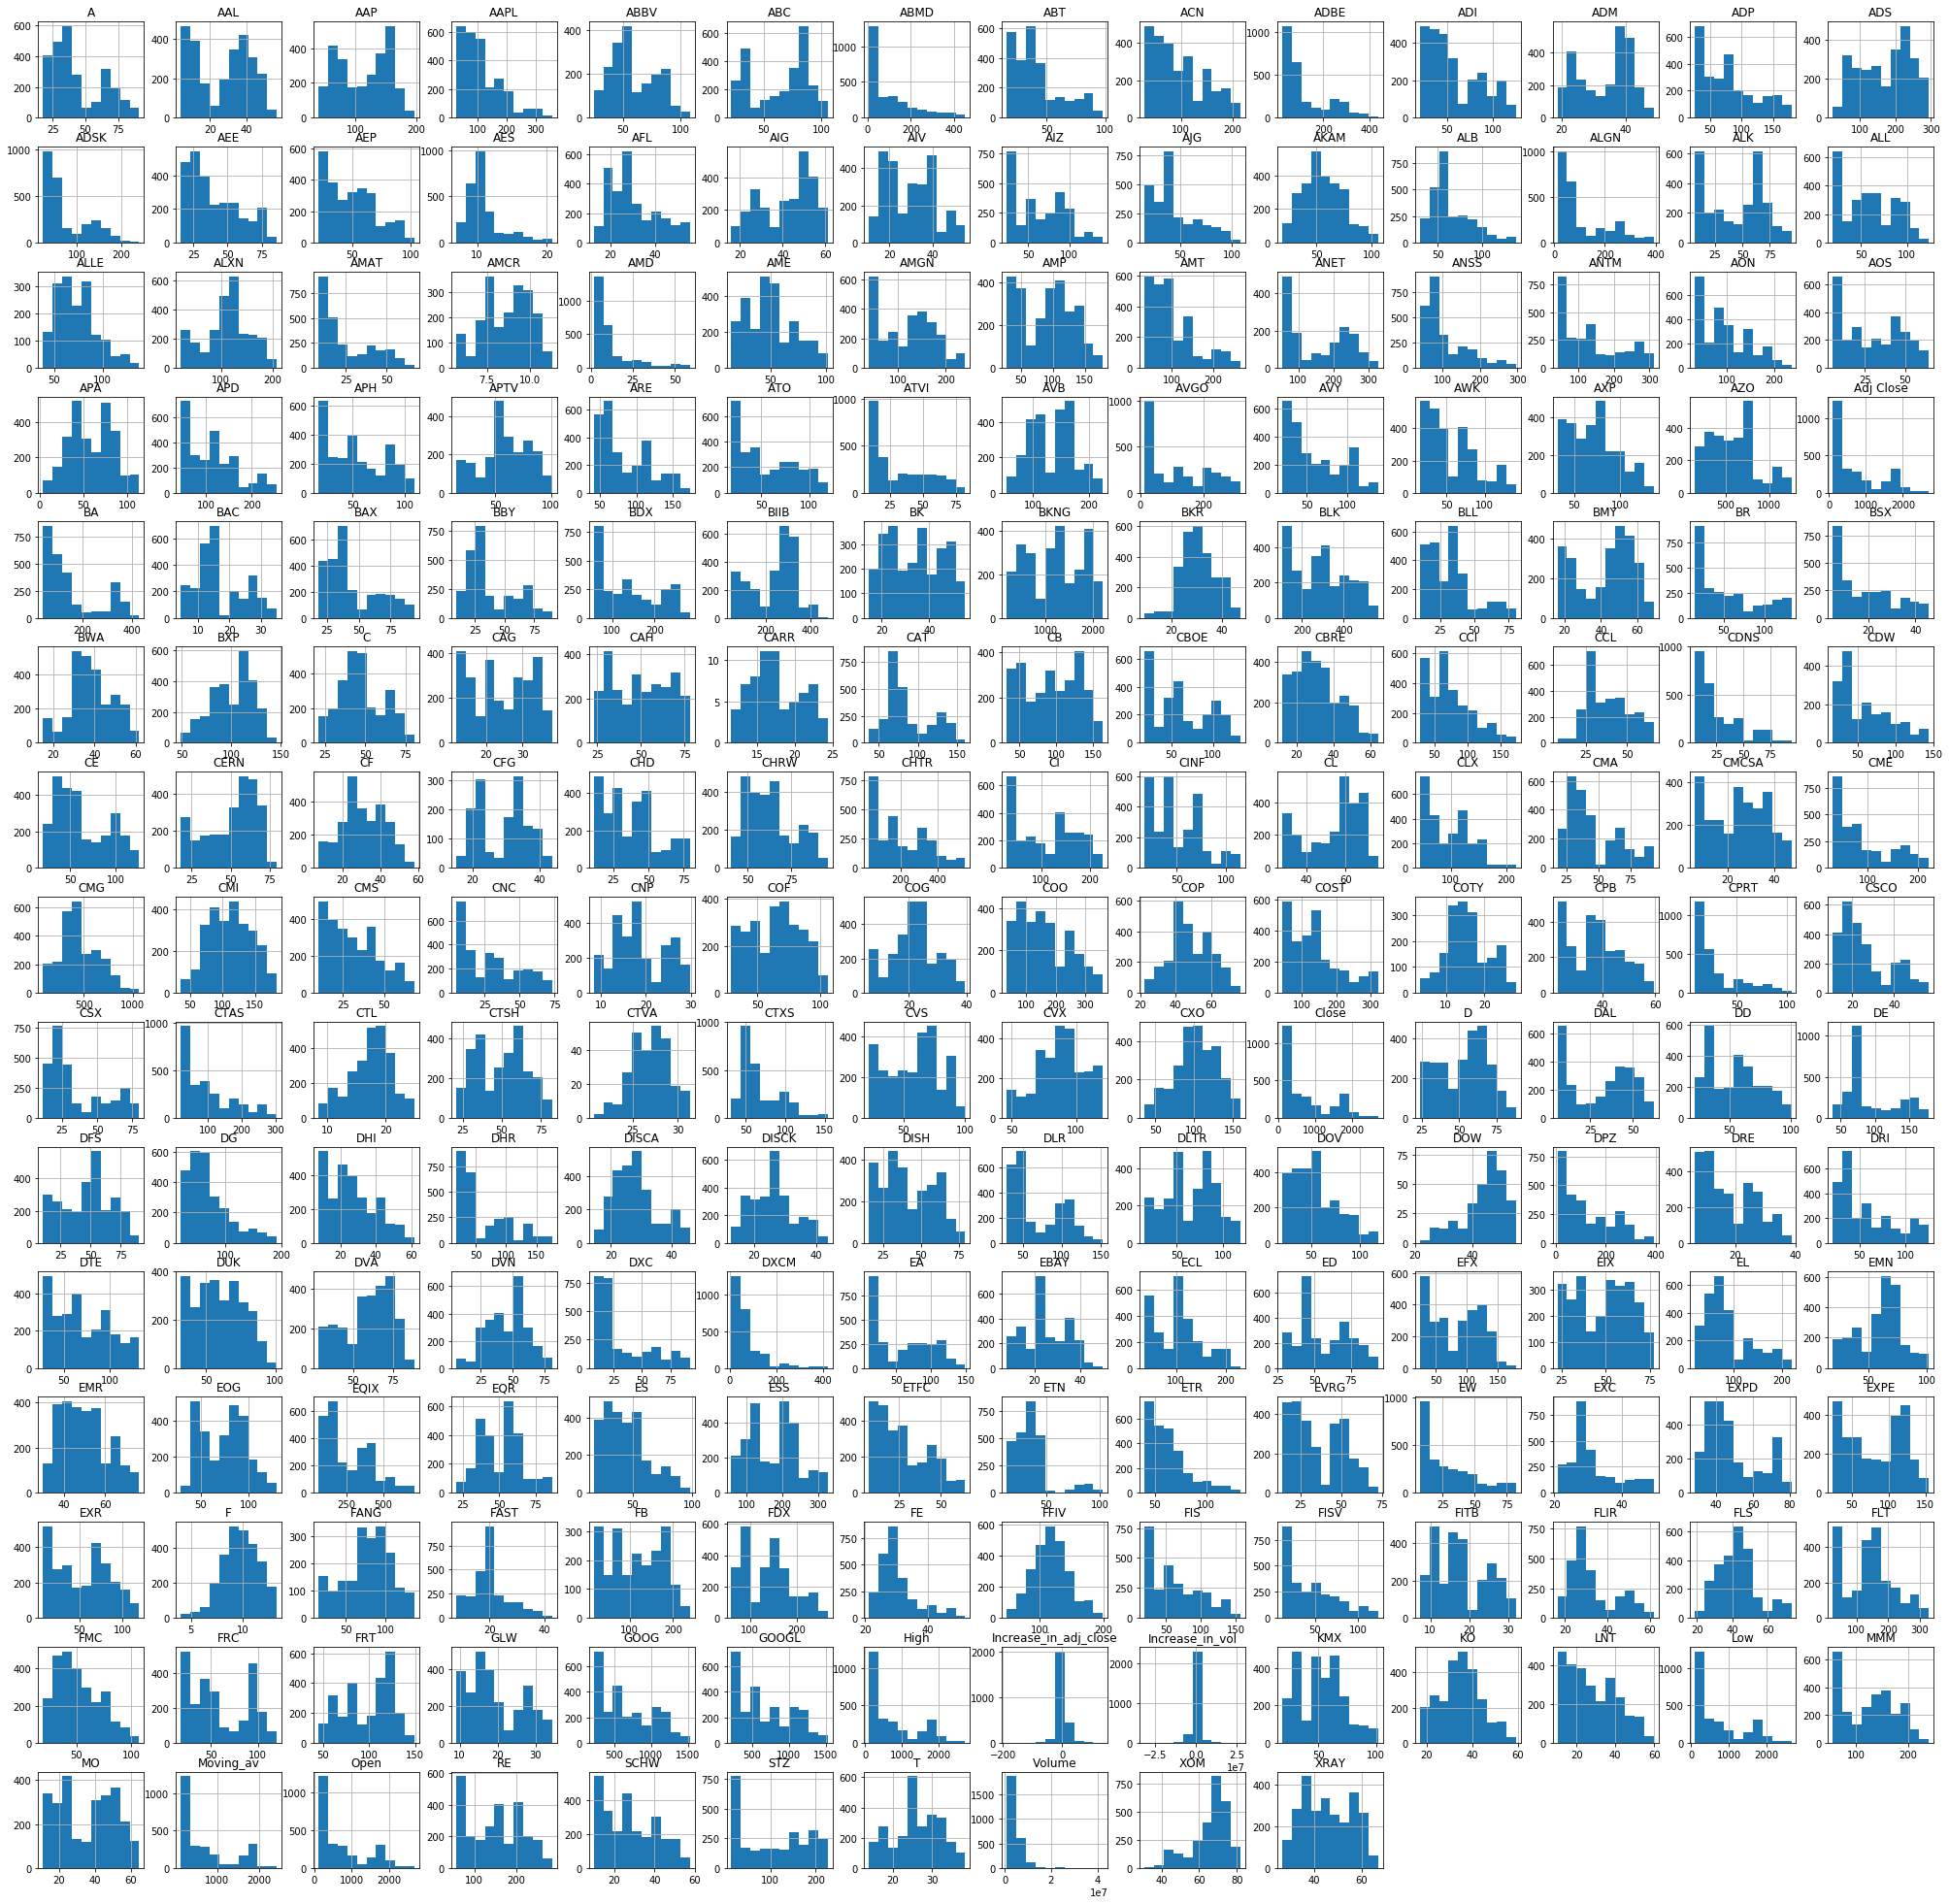

In [200]:
df3.hist(figsize = (35,35))
plt.show()

In [201]:
df3.fillna(0, inplace=True)

In [202]:
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

In [203]:
col_y=y_df.columns
print(col_y)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [204]:
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)

In [205]:
y_df_mod.columns

Index(['High', 'Low', 'Open', 'Close'], dtype='object')

In [206]:
Drop_cols=col_y

In [207]:
Drop_cols=Drop_cols.tolist()

In [208]:
Drop_cols.append('Date')


In [209]:
X_df=df3.drop(Drop_cols,axis=1)

In [210]:
X_df.columns

Index(['Moving_av', 'Increase_in_vol', 'Increase_in_adj_close', 'MMM', 'ABT',
       'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE',
       ...
       'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F'],
      dtype='object', length=200)

In [211]:
X=X_df.values

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [213]:

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 200, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [214]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)

In [218]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=regressor.fit(X_train,y_train,callbacks=[callback])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_43 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_44 (Dense)             (None, 4)                 1028      
Total params: 50,916
Trainable params: 50,916
Non-trainable params: 0
_________________________________________________________________
Train on 1845 samples
Epoch 1/2000
1845/1845 [==============================] - 1s 419us/sample - loss: 664.2635 - 

1845/1845 [==============================] - 0s 108us/sample - loss: 63.4576 - accuracy: 0.5366 - mean_absolute_error: 63.4576
Epoch 52/2000
1845/1845 [==============================] - 0s 114us/sample - loss: 76.8582 - accuracy: 0.6331 - mean_absolute_error: 76.8582
Epoch 53/2000
1845/1845 [==============================] - 0s 149us/sample - loss: 69.2701 - accuracy: 0.6206 - mean_absolute_error: 69.2700
Epoch 54/2000
1845/1845 [==============================] - 0s 114us/sample - loss: 60.7526 - accuracy: 0.7198 - mean_absolute_error: 60.7526
Epoch 55/2000
1845/1845 [==============================] - 0s 112us/sample - loss: 51.1798 - accuracy: 0.6423 - mean_absolute_error: 51.1798
Epoch 56/2000
1845/1845 [==============================] - 0s 78us/sample - loss: 62.8372 - accuracy: 0.7171 - mean_absolute_error: 62.8372
Epoch 57/2000
1845/1845 [==============================] - 0s 110us/sample - loss: 54.7218 - accuracy: 0.7745 - mean_absolute_error: 54.7219
Epoch 58/2000
1845/1845 [===

1845/1845 [==============================] - 0s 118us/sample - loss: 43.1783 - accuracy: 0.8168 - mean_absolute_error: 43.1783
Epoch 110/2000
1845/1845 [==============================] - 0s 91us/sample - loss: 54.0656 - accuracy: 0.8222 - mean_absolute_error: 54.0656
Epoch 111/2000
1845/1845 [==============================] - 0s 100us/sample - loss: 41.8567 - accuracy: 0.7854 - mean_absolute_error: 41.8567
Epoch 112/2000
1845/1845 [==============================] - 0s 83us/sample - loss: 47.2486 - accuracy: 0.8553 - mean_absolute_error: 47.2486
Epoch 113/2000
1845/1845 [==============================] - 0s 81us/sample - loss: 44.5709 - accuracy: 0.8363 - mean_absolute_error: 44.5709
Epoch 114/2000
1845/1845 [==============================] - 0s 90us/sample - loss: 44.1978 - accuracy: 0.8867 - mean_absolute_error: 44.1978
Epoch 115/2000
1845/1845 [==============================] - 0s 134us/sample - loss: 49.1970 - accuracy: 0.7740 - mean_absolute_error: 49.1970
Epoch 116/2000
1845/1845 

Epoch 167/2000
1845/1845 [==============================] - 0s 142us/sample - loss: 37.8407 - accuracy: 0.8997 - mean_absolute_error: 37.8407
Epoch 168/2000
1845/1845 [==============================] - 0s 122us/sample - loss: 44.7491 - accuracy: 0.8369 - mean_absolute_error: 44.7491
Epoch 169/2000
1845/1845 [==============================] - 0s 108us/sample - loss: 43.6922 - accuracy: 0.8813 - mean_absolute_error: 43.6922
Epoch 170/2000
1845/1845 [==============================] - 0s 103us/sample - loss: 46.8467 - accuracy: 0.8802 - mean_absolute_error: 46.8467
Epoch 171/2000
1845/1845 [==============================] - 0s 104us/sample - loss: 41.1788 - accuracy: 0.8325 - mean_absolute_error: 41.1788
Epoch 172/2000
1845/1845 [==============================] - 0s 126us/sample - loss: 46.0267 - accuracy: 0.7875 - mean_absolute_error: 46.0267
Epoch 173/2000
1845/1845 [==============================] - 0s 106us/sample - loss: 47.6635 - accuracy: 0.8287 - mean_absolute_error: 47.6635
Epoch 

Epoch 225/2000
1845/1845 [==============================] - 0s 110us/sample - loss: 40.6620 - accuracy: 0.9133 - mean_absolute_error: 40.6620
Epoch 226/2000
1845/1845 [==============================] - 0s 95us/sample - loss: 37.4143 - accuracy: 0.9089 - mean_absolute_error: 37.4143
Epoch 227/2000
1845/1845 [==============================] - 0s 95us/sample - loss: 40.8752 - accuracy: 0.8596 - mean_absolute_error: 40.8752
Epoch 228/2000
1845/1845 [==============================] - 0s 87us/sample - loss: 41.0227 - accuracy: 0.7577 - mean_absolute_error: 41.0227
Epoch 229/2000
1845/1845 [==============================] - 0s 82us/sample - loss: 41.3833 - accuracy: 0.8710 - mean_absolute_error: 41.3833
Epoch 230/2000
1845/1845 [==============================] - 0s 87us/sample - loss: 47.5812 - accuracy: 0.8645 - mean_absolute_error: 47.5812
Epoch 231/2000
1845/1845 [==============================] - 0s 83us/sample - loss: 39.5811 - accuracy: 0.8678 - mean_absolute_error: 39.5811
Epoch 232/20

1845/1845 [==============================] - 0s 106us/sample - loss: 37.9276 - accuracy: 0.7436 - mean_absolute_error: 37.9276
Epoch 283/2000
1845/1845 [==============================] - 0s 150us/sample - loss: 43.8026 - accuracy: 0.7518 - mean_absolute_error: 43.8026
Epoch 284/2000
1845/1845 [==============================] - 0s 105us/sample - loss: 38.8150 - accuracy: 0.7978 - mean_absolute_error: 38.8150
Epoch 285/2000
1845/1845 [==============================] - 0s 99us/sample - loss: 40.3617 - accuracy: 0.7604 - mean_absolute_error: 40.3617
Epoch 286/2000
1845/1845 [==============================] - 0s 109us/sample - loss: 40.9693 - accuracy: 0.6959 - mean_absolute_error: 40.9693
Epoch 287/2000
1845/1845 [==============================] - 0s 119us/sample - loss: 36.5388 - accuracy: 0.6813 - mean_absolute_error: 36.5388
Epoch 288/2000
1845/1845 [==============================] - 0s 120us/sample - loss: 37.3145 - accuracy: 0.6569 - mean_absolute_error: 37.3145
Epoch 289/2000
1845/18

1845/1845 [==============================] - 0s 95us/sample - loss: 34.2397 - accuracy: 0.8959 - mean_absolute_error: 34.2397
Epoch 340/2000
1845/1845 [==============================] - 0s 88us/sample - loss: 41.1814 - accuracy: 0.9523 - mean_absolute_error: 41.1814
Epoch 341/2000
1845/1845 [==============================] - 0s 92us/sample - loss: 37.2578 - accuracy: 0.9848 - mean_absolute_error: 37.2578
Epoch 342/2000
1845/1845 [==============================] - 0s 86us/sample - loss: 45.5180 - accuracy: 0.8976 - mean_absolute_error: 45.5181
Epoch 343/2000
1845/1845 [==============================] - 0s 90us/sample - loss: 50.2806 - accuracy: 0.9669 - mean_absolute_error: 50.2806
Epoch 344/2000
1845/1845 [==============================] - 0s 83us/sample - loss: 36.3403 - accuracy: 0.9696 - mean_absolute_error: 36.3403
Epoch 345/2000
1845/1845 [==============================] - 0s 83us/sample - loss: 43.7752 - accuracy: 0.9051 - mean_absolute_error: 43.7752
Epoch 346/2000
1845/1845 [==

1845/1845 [==============================] - 0s 86us/sample - loss: 37.0670 - accuracy: 0.7095 - mean_absolute_error: 37.0670
Epoch 398/2000
1845/1845 [==============================] - 0s 86us/sample - loss: 35.2191 - accuracy: 0.9843 - mean_absolute_error: 35.2191
Epoch 399/2000
1845/1845 [==============================] - 0s 90us/sample - loss: 45.5662 - accuracy: 0.9241 - mean_absolute_error: 45.5662
Epoch 400/2000
1845/1845 [==============================] - 0s 86us/sample - loss: 37.2022 - accuracy: 0.9393 - mean_absolute_error: 37.2022
Epoch 401/2000
1845/1845 [==============================] - 0s 83us/sample - loss: 37.6260 - accuracy: 0.9767 - mean_absolute_error: 37.6260
Epoch 402/2000
1845/1845 [==============================] - 0s 86us/sample - loss: 38.1209 - accuracy: 0.9837 - mean_absolute_error: 38.1209
Epoch 403/2000
1845/1845 [==============================] - 0s 82us/sample - loss: 43.3334 - accuracy: 0.9837 - mean_absolute_error: 43.3334
Epoch 404/2000
1845/1845 [==

1845/1845 [==============================] - 0s 88us/sample - loss: 32.3477 - accuracy: 0.9664 - mean_absolute_error: 32.3477
Epoch 456/2000
1845/1845 [==============================] - 0s 84us/sample - loss: 36.9758 - accuracy: 0.9919 - mean_absolute_error: 36.9758
Epoch 457/2000
1845/1845 [==============================] - 0s 82us/sample - loss: 34.3048 - accuracy: 0.9252 - mean_absolute_error: 34.3048
Epoch 458/2000
1845/1845 [==============================] - 0s 86us/sample - loss: 33.3439 - accuracy: 0.9957 - mean_absolute_error: 33.3439
Epoch 459/2000
1845/1845 [==============================] - 0s 85us/sample - loss: 33.7676 - accuracy: 0.9279 - mean_absolute_error: 33.7676
Epoch 460/2000
1845/1845 [==============================] - 0s 86us/sample - loss: 36.8119 - accuracy: 0.9528 - mean_absolute_error: 36.8119
Epoch 461/2000
1845/1845 [==============================] - 0s 85us/sample - loss: 35.6558 - accuracy: 0.9805 - mean_absolute_error: 35.6558
Epoch 462/2000
1845/1845 [==

1845/1845 [==============================] - 0s 88us/sample - loss: 35.4845 - accuracy: 0.9740 - mean_absolute_error: 35.4845
Epoch 514/2000
1845/1845 [==============================] - 0s 84us/sample - loss: 44.6609 - accuracy: 0.9886 - mean_absolute_error: 44.6609
Epoch 515/2000
1845/1845 [==============================] - 0s 79us/sample - loss: 32.6055 - accuracy: 0.8753 - mean_absolute_error: 32.6055
Epoch 516/2000
1845/1845 [==============================] - 0s 89us/sample - loss: 36.3949 - accuracy: 0.9734 - mean_absolute_error: 36.3949
Epoch 517/2000
1845/1845 [==============================] - 0s 83us/sample - loss: 33.8050 - accuracy: 0.9734 - mean_absolute_error: 33.8050
Epoch 518/2000
1845/1845 [==============================] - 0s 83us/sample - loss: 33.0468 - accuracy: 0.9241 - mean_absolute_error: 33.0468
Epoch 519/2000
1845/1845 [==============================] - 0s 78us/sample - loss: 32.8727 - accuracy: 0.9935 - mean_absolute_error: 32.8727
Epoch 520/2000
1845/1845 [==

1845/1845 [==============================] - 0s 89us/sample - loss: 32.8806 - accuracy: 0.9745 - mean_absolute_error: 32.8806
Epoch 572/2000
1845/1845 [==============================] - 0s 91us/sample - loss: 33.7252 - accuracy: 0.9496 - mean_absolute_error: 33.7252
Epoch 573/2000
1845/1845 [==============================] - 0s 93us/sample - loss: 33.4814 - accuracy: 0.9734 - mean_absolute_error: 33.4814
Epoch 574/2000
1845/1845 [==============================] - 0s 98us/sample - loss: 32.0330 - accuracy: 0.9220 - mean_absolute_error: 32.0330
Epoch 575/2000
1845/1845 [==============================] - 0s 85us/sample - loss: 30.6675 - accuracy: 0.9902 - mean_absolute_error: 30.6675
Epoch 576/2000
1845/1845 [==============================] - 0s 97us/sample - loss: 34.9363 - accuracy: 1.0000 - mean_absolute_error: 34.9363
Epoch 577/2000
1845/1845 [==============================] - 0s 86us/sample - loss: 37.8931 - accuracy: 0.9875 - mean_absolute_error: 37.8931
Epoch 578/2000
1845/1845 [==

Epoch 629/2000
1845/1845 [==============================] - 0s 254us/sample - loss: 33.5952 - accuracy: 0.9989 - mean_absolute_error: 33.5952
Epoch 630/2000
1845/1845 [==============================] - 0s 180us/sample - loss: 33.5644 - accuracy: 0.9946 - mean_absolute_error: 33.5644
Epoch 631/2000
1845/1845 [==============================] - 0s 191us/sample - loss: 30.2695 - accuracy: 0.9799 - mean_absolute_error: 30.2695
Epoch 632/2000
1845/1845 [==============================] - 0s 191us/sample - loss: 29.2487 - accuracy: 0.9930 - mean_absolute_error: 29.2487
Epoch 633/2000
1845/1845 [==============================] - 0s 183us/sample - loss: 32.0764 - accuracy: 0.9203 - mean_absolute_error: 32.0764
Epoch 634/2000
1845/1845 [==============================] - 0s 211us/sample - loss: 33.7416 - accuracy: 0.9951 - mean_absolute_error: 33.7416
Epoch 635/2000
1845/1845 [==============================] - 0s 243us/sample - loss: 34.5892 - accuracy: 0.9973 - mean_absolute_error: 34.5892
Epoch 

1845/1845 [==============================] - 0s 109us/sample - loss: 38.3469 - accuracy: 0.9480 - mean_absolute_error: 38.3469
Epoch 687/2000
1845/1845 [==============================] - 0s 117us/sample - loss: 31.0360 - accuracy: 0.9642 - mean_absolute_error: 31.0360
Epoch 688/2000
1845/1845 [==============================] - 0s 147us/sample - loss: 30.9300 - accuracy: 0.9263 - mean_absolute_error: 30.9300
Epoch 689/2000
1845/1845 [==============================] - 0s 129us/sample - loss: 32.0956 - accuracy: 1.0000 - mean_absolute_error: 32.0956
Epoch 690/2000
1845/1845 [==============================] - 0s 108us/sample - loss: 32.2876 - accuracy: 1.0000 - mean_absolute_error: 32.2876
Epoch 691/2000
1845/1845 [==============================] - 0s 119us/sample - loss: 31.4324 - accuracy: 0.9924 - mean_absolute_error: 31.4324
Epoch 692/2000
1845/1845 [==============================] - 0s 104us/sample - loss: 32.8714 - accuracy: 0.9436 - mean_absolute_error: 32.8714
Epoch 693/2000
1845/1

Epoch 744/2000
1845/1845 [==============================] - 0s 100us/sample - loss: 35.2379 - accuracy: 0.9100 - mean_absolute_error: 35.2379
Epoch 745/2000
1845/1845 [==============================] - 0s 138us/sample - loss: 33.3786 - accuracy: 0.9648 - mean_absolute_error: 33.3786
Epoch 746/2000
1845/1845 [==============================] - 0s 132us/sample - loss: 37.9085 - accuracy: 0.9973 - mean_absolute_error: 37.9085
Epoch 747/2000
1845/1845 [==============================] - 0s 101us/sample - loss: 39.4253 - accuracy: 0.9957 - mean_absolute_error: 39.4253
Epoch 748/2000
1845/1845 [==============================] - 0s 85us/sample - loss: 31.5887 - accuracy: 0.9984 - mean_absolute_error: 31.5887
Epoch 749/2000
1845/1845 [==============================] - 0s 65us/sample - loss: 32.5988 - accuracy: 0.9967 - mean_absolute_error: 32.5988
Epoch 750/2000
1845/1845 [==============================] - 0s 64us/sample - loss: 38.0862 - accuracy: 0.9003 - mean_absolute_error: 38.0862
Epoch 751

Epoch 802/2000
1845/1845 [==============================] - 0s 107us/sample - loss: 32.1701 - accuracy: 0.9388 - mean_absolute_error: 32.1701
Epoch 803/2000
1845/1845 [==============================] - 0s 143us/sample - loss: 36.9532 - accuracy: 1.0000 - mean_absolute_error: 36.9532
Epoch 804/2000
1845/1845 [==============================] - 0s 187us/sample - loss: 35.9517 - accuracy: 1.0000 - mean_absolute_error: 35.9517
Epoch 805/2000
1845/1845 [==============================] - 0s 143us/sample - loss: 33.0548 - accuracy: 0.9984 - mean_absolute_error: 33.0548
Epoch 806/2000
1845/1845 [==============================] - 0s 111us/sample - loss: 31.8419 - accuracy: 0.9989 - mean_absolute_error: 31.8419
Epoch 807/2000
1845/1845 [==============================] - 0s 129us/sample - loss: 31.2454 - accuracy: 0.9919 - mean_absolute_error: 31.2454
Epoch 808/2000
1845/1845 [==============================] - 0s 131us/sample - loss: 30.3979 - accuracy: 0.9875 - mean_absolute_error: 30.3979
Epoch 

1845/1845 [==============================] - 0s 131us/sample - loss: 33.5469 - accuracy: 1.0000 - mean_absolute_error: 33.5469
Epoch 860/2000
1845/1845 [==============================] - 0s 116us/sample - loss: 31.5159 - accuracy: 0.9973 - mean_absolute_error: 31.5159
Epoch 861/2000
1845/1845 [==============================] - 0s 119us/sample - loss: 33.1968 - accuracy: 0.9322 - mean_absolute_error: 33.1968
Epoch 862/2000
1845/1845 [==============================] - 0s 119us/sample - loss: 30.2363 - accuracy: 1.0000 - mean_absolute_error: 30.2363
Epoch 863/2000
1845/1845 [==============================] - 0s 143us/sample - loss: 30.4229 - accuracy: 1.0000 - mean_absolute_error: 30.4229
Epoch 864/2000
1845/1845 [==============================] - 0s 132us/sample - loss: 36.1779 - accuracy: 1.0000 - mean_absolute_error: 36.1779
Epoch 865/2000
1845/1845 [==============================] - 0s 181us/sample - loss: 30.3685 - accuracy: 1.0000 - mean_absolute_error: 30.3685
Epoch 866/2000
1845/1

1845/1845 [==============================] - 0s 136us/sample - loss: 28.1888 - accuracy: 0.8645 - mean_absolute_error: 28.1888
Epoch 917/2000
1845/1845 [==============================] - 0s 133us/sample - loss: 27.1411 - accuracy: 0.9946 - mean_absolute_error: 27.1411
Epoch 918/2000
1845/1845 [==============================] - 0s 131us/sample - loss: 28.0799 - accuracy: 0.9864 - mean_absolute_error: 28.0800
Epoch 919/2000
1845/1845 [==============================] - 0s 134us/sample - loss: 29.9771 - accuracy: 0.9995 - mean_absolute_error: 29.9771
Epoch 920/2000
1845/1845 [==============================] - 0s 132us/sample - loss: 29.6420 - accuracy: 1.0000 - mean_absolute_error: 29.6420
Epoch 921/2000
1845/1845 [==============================] - 0s 130us/sample - loss: 32.5354 - accuracy: 0.8932 - mean_absolute_error: 32.5354
Epoch 922/2000
1845/1845 [==============================] - 0s 130us/sample - loss: 35.0537 - accuracy: 0.9995 - mean_absolute_error: 35.0537
Epoch 923/2000
1845/1

Epoch 974/2000
1845/1845 [==============================] - 0s 90us/sample - loss: 32.9740 - accuracy: 0.9388 - mean_absolute_error: 32.9740
Epoch 975/2000
1845/1845 [==============================] - 0s 90us/sample - loss: 30.9841 - accuracy: 1.0000 - mean_absolute_error: 30.9841
Epoch 976/2000
1845/1845 [==============================] - 0s 89us/sample - loss: 30.9220 - accuracy: 0.9360 - mean_absolute_error: 30.9220
Epoch 977/2000
1845/1845 [==============================] - 0s 99us/sample - loss: 28.6354 - accuracy: 0.9653 - mean_absolute_error: 28.6354
Epoch 978/2000
1845/1845 [==============================] - 0s 108us/sample - loss: 29.4758 - accuracy: 0.9940 - mean_absolute_error: 29.4758
Epoch 979/2000
1845/1845 [==============================] - 0s 97us/sample - loss: 29.9809 - accuracy: 0.9301 - mean_absolute_error: 29.9809
Epoch 980/2000
1845/1845 [==============================] - 0s 89us/sample - loss: 31.8038 - accuracy: 0.9745 - mean_absolute_error: 31.8038
Epoch 981/20

1845/1845 [==============================] - 0s 130us/sample - loss: 29.8435 - accuracy: 1.0000 - mean_absolute_error: 29.8435
Epoch 1032/2000
1845/1845 [==============================] - 0s 106us/sample - loss: 31.7327 - accuracy: 0.9610 - mean_absolute_error: 31.7327
Epoch 1033/2000
1845/1845 [==============================] - 0s 103us/sample - loss: 28.1321 - accuracy: 0.9821 - mean_absolute_error: 28.1321
Epoch 1034/2000
1845/1845 [==============================] - 0s 88us/sample - loss: 30.0910 - accuracy: 0.9252 - mean_absolute_error: 30.0910
Epoch 1035/2000
1845/1845 [==============================] - 0s 89us/sample - loss: 30.1441 - accuracy: 0.9930 - mean_absolute_error: 30.1441
Epoch 1036/2000
1845/1845 [==============================] - 0s 88us/sample - loss: 29.1291 - accuracy: 1.0000 - mean_absolute_error: 29.1291
Epoch 1037/2000
1845/1845 [==============================] - 0s 89us/sample - loss: 28.4146 - accuracy: 0.9995 - mean_absolute_error: 28.4146
Epoch 1038/2000
184

1845/1845 [==============================] - 0s 97us/sample - loss: 33.7318 - accuracy: 0.9919 - mean_absolute_error: 33.7318
Epoch 1089/2000
1845/1845 [==============================] - 0s 93us/sample - loss: 30.9751 - accuracy: 0.9978 - mean_absolute_error: 30.9751
Epoch 1090/2000
1845/1845 [==============================] - 0s 96us/sample - loss: 31.3679 - accuracy: 0.9995 - mean_absolute_error: 31.3679
Epoch 1091/2000
1845/1845 [==============================] - 0s 91us/sample - loss: 30.6802 - accuracy: 0.9837 - mean_absolute_error: 30.6802
Epoch 1092/2000
1845/1845 [==============================] - 0s 95us/sample - loss: 29.6519 - accuracy: 0.9740 - mean_absolute_error: 29.6519
Epoch 1093/2000
1845/1845 [==============================] - 0s 91us/sample - loss: 30.4616 - accuracy: 0.9967 - mean_absolute_error: 30.4616
Epoch 1094/2000
1845/1845 [==============================] - 0s 93us/sample - loss: 29.4528 - accuracy: 0.9404 - mean_absolute_error: 29.4528
Epoch 1095/2000
1845/1

1845/1845 [==============================] - 0s 114us/sample - loss: 29.0165 - accuracy: 0.9257 - mean_absolute_error: 29.0165
Epoch 1146/2000
1845/1845 [==============================] - 0s 100us/sample - loss: 28.6935 - accuracy: 1.0000 - mean_absolute_error: 28.6935
Epoch 1147/2000
1845/1845 [==============================] - 0s 122us/sample - loss: 31.6500 - accuracy: 0.9713 - mean_absolute_error: 31.6500
Epoch 1148/2000
1845/1845 [==============================] - 0s 99us/sample - loss: 29.7650 - accuracy: 0.9989 - mean_absolute_error: 29.7650
Epoch 1149/2000
1845/1845 [==============================] - 0s 112us/sample - loss: 28.7061 - accuracy: 0.9973 - mean_absolute_error: 28.7061
Epoch 1150/2000
1845/1845 [==============================] - 0s 112us/sample - loss: 29.2334 - accuracy: 1.0000 - mean_absolute_error: 29.2334
Epoch 1151/2000
1845/1845 [==============================] - 0s 103us/sample - loss: 27.6305 - accuracy: 0.9995 - mean_absolute_error: 27.6305
Epoch 1152/2000


1845/1845 [==============================] - 0s 104us/sample - loss: 32.4617 - accuracy: 1.0000 - mean_absolute_error: 32.4617
Epoch 1203/2000
1845/1845 [==============================] - 0s 109us/sample - loss: 28.4803 - accuracy: 1.0000 - mean_absolute_error: 28.4803
Epoch 1204/2000
1845/1845 [==============================] - 0s 100us/sample - loss: 34.0620 - accuracy: 1.0000 - mean_absolute_error: 34.0620
Epoch 1205/2000
1845/1845 [==============================] - 0s 94us/sample - loss: 28.1309 - accuracy: 1.0000 - mean_absolute_error: 28.1309
Epoch 1206/2000
1845/1845 [==============================] - 0s 91us/sample - loss: 29.5103 - accuracy: 1.0000 - mean_absolute_error: 29.5103
Epoch 1207/2000
1845/1845 [==============================] - 0s 88us/sample - loss: 28.2876 - accuracy: 0.9734 - mean_absolute_error: 28.2876
Epoch 1208/2000
1845/1845 [==============================] - 0s 89us/sample - loss: 29.6168 - accuracy: 1.0000 - mean_absolute_error: 29.6168
Epoch 1209/2000
184

1845/1845 [==============================] - 0s 98us/sample - loss: 30.9394 - accuracy: 0.9897 - mean_absolute_error: 30.9394
Epoch 1260/2000
1845/1845 [==============================] - 0s 130us/sample - loss: 31.8123 - accuracy: 1.0000 - mean_absolute_error: 31.8123
Epoch 1261/2000
1845/1845 [==============================] - 0s 108us/sample - loss: 32.4794 - accuracy: 0.9106 - mean_absolute_error: 32.4794
Epoch 1262/2000
1845/1845 [==============================] - 0s 100us/sample - loss: 28.0737 - accuracy: 1.0000 - mean_absolute_error: 28.0737
Epoch 1263/2000
1845/1845 [==============================] - 0s 113us/sample - loss: 27.6354 - accuracy: 0.9696 - mean_absolute_error: 27.6354
Epoch 1264/2000
1845/1845 [==============================] - 0s 116us/sample - loss: 29.8414 - accuracy: 1.0000 - mean_absolute_error: 29.8414
Epoch 1265/2000
1845/1845 [==============================] - 0s 109us/sample - loss: 27.3359 - accuracy: 1.0000 - mean_absolute_error: 27.3359
Epoch 1266/2000


1845/1845 [==============================] - 0s 101us/sample - loss: 29.6216 - accuracy: 1.0000 - mean_absolute_error: 29.6216
Epoch 1317/2000
1845/1845 [==============================] - 0s 97us/sample - loss: 28.8237 - accuracy: 1.0000 - mean_absolute_error: 28.8237
Epoch 1318/2000
1845/1845 [==============================] - 0s 99us/sample - loss: 28.8016 - accuracy: 1.0000 - mean_absolute_error: 28.8016
Epoch 1319/2000
1845/1845 [==============================] - 0s 151us/sample - loss: 31.5925 - accuracy: 1.0000 - mean_absolute_error: 31.5925
Epoch 1320/2000
1845/1845 [==============================] - 0s 177us/sample - loss: 29.6729 - accuracy: 1.0000 - mean_absolute_error: 29.6729
Epoch 1321/2000
1845/1845 [==============================] - 0s 133us/sample - loss: 29.9279 - accuracy: 1.0000 - mean_absolute_error: 29.9279
Epoch 1322/2000
1845/1845 [==============================] - 0s 136us/sample - loss: 33.0375 - accuracy: 1.0000 - mean_absolute_error: 33.0375
Epoch 1323/2000
1

1845/1845 [==============================] - 0s 129us/sample - loss: 29.4410 - accuracy: 0.9978 - mean_absolute_error: 29.4411
Epoch 1374/2000
1845/1845 [==============================] - 0s 125us/sample - loss: 26.2302 - accuracy: 0.9919 - mean_absolute_error: 26.2302
Epoch 1375/2000
1845/1845 [==============================] - 0s 106us/sample - loss: 31.7467 - accuracy: 1.0000 - mean_absolute_error: 31.7467
Epoch 1376/2000
1845/1845 [==============================] - 0s 103us/sample - loss: 28.7153 - accuracy: 1.0000 - mean_absolute_error: 28.7153
Epoch 1377/2000
1845/1845 [==============================] - 0s 97us/sample - loss: 28.5981 - accuracy: 0.9962 - mean_absolute_error: 28.5981
Epoch 1378/2000
1845/1845 [==============================] - 0s 94us/sample - loss: 30.0539 - accuracy: 1.0000 - mean_absolute_error: 30.0539
Epoch 1379/2000
1845/1845 [==============================] - 0s 98us/sample - loss: 26.4587 - accuracy: 1.0000 - mean_absolute_error: 26.4587
Epoch 1380/2000
18

1845/1845 [==============================] - 0s 104us/sample - loss: 34.0679 - accuracy: 1.0000 - mean_absolute_error: 34.0679
Epoch 1431/2000
1845/1845 [==============================] - 0s 131us/sample - loss: 29.1819 - accuracy: 0.9995 - mean_absolute_error: 29.1819
Epoch 1432/2000
1845/1845 [==============================] - 0s 106us/sample - loss: 29.2139 - accuracy: 1.0000 - mean_absolute_error: 29.2139
Epoch 1433/2000
1845/1845 [==============================] - 0s 94us/sample - loss: 30.6559 - accuracy: 0.9745 - mean_absolute_error: 30.6559
Epoch 1434/2000
1845/1845 [==============================] - 0s 95us/sample - loss: 26.8270 - accuracy: 0.9995 - mean_absolute_error: 26.8270
Epoch 1435/2000
1845/1845 [==============================] - 0s 91us/sample - loss: 43.6178 - accuracy: 0.9892 - mean_absolute_error: 43.6178
Epoch 1436/2000
1845/1845 [==============================] - 0s 94us/sample - loss: 33.8181 - accuracy: 0.9870 - mean_absolute_error: 33.8181
Epoch 1437/2000
184

1845/1845 [==============================] - 0s 118us/sample - loss: 27.2988 - accuracy: 0.9274 - mean_absolute_error: 27.2988
Epoch 1488/2000
1845/1845 [==============================] - 0s 122us/sample - loss: 28.6700 - accuracy: 1.0000 - mean_absolute_error: 28.6700
Epoch 1489/2000
1845/1845 [==============================] - 0s 122us/sample - loss: 30.3324 - accuracy: 0.9843 - mean_absolute_error: 30.3324
Epoch 1490/2000
1845/1845 [==============================] - 0s 104us/sample - loss: 42.4520 - accuracy: 0.9989 - mean_absolute_error: 42.4520
Epoch 1491/2000
1845/1845 [==============================] - 0s 127us/sample - loss: 28.7470 - accuracy: 0.9648 - mean_absolute_error: 28.7470
Epoch 1492/2000
1845/1845 [==============================] - 0s 107us/sample - loss: 28.2350 - accuracy: 0.9995 - mean_absolute_error: 28.2350
Epoch 1493/2000
1845/1845 [==============================] - 0s 102us/sample - loss: 30.3448 - accuracy: 0.9995 - mean_absolute_error: 30.3448
Epoch 1494/2000

1845/1845 [==============================] - 0s 103us/sample - loss: 30.7476 - accuracy: 1.0000 - mean_absolute_error: 30.7476
Epoch 1545/2000
1845/1845 [==============================] - 0s 110us/sample - loss: 27.7677 - accuracy: 1.0000 - mean_absolute_error: 27.7677
Epoch 1546/2000
1845/1845 [==============================] - 0s 107us/sample - loss: 37.1862 - accuracy: 1.0000 - mean_absolute_error: 37.1862
Epoch 1547/2000
1845/1845 [==============================] - 0s 106us/sample - loss: 28.6088 - accuracy: 1.0000 - mean_absolute_error: 28.6088
Epoch 1548/2000
1845/1845 [==============================] - 0s 103us/sample - loss: 29.4048 - accuracy: 0.9995 - mean_absolute_error: 29.4048
Epoch 1549/2000
1845/1845 [==============================] - 0s 101us/sample - loss: 27.4738 - accuracy: 1.0000 - mean_absolute_error: 27.4738
Epoch 1550/2000
1845/1845 [==============================] - 0s 100us/sample - loss: 30.8186 - accuracy: 0.9724 - mean_absolute_error: 30.8186
Epoch 1551/2000

1845/1845 [==============================] - 0s 148us/sample - loss: 29.4461 - accuracy: 0.9995 - mean_absolute_error: 29.4461
Epoch 1602/2000
1845/1845 [==============================] - 0s 154us/sample - loss: 32.0059 - accuracy: 1.0000 - mean_absolute_error: 32.0059
Epoch 1603/2000
1845/1845 [==============================] - 0s 148us/sample - loss: 37.6562 - accuracy: 0.9897 - mean_absolute_error: 37.6562
Epoch 1604/2000
1845/1845 [==============================] - 0s 149us/sample - loss: 30.6764 - accuracy: 0.9995 - mean_absolute_error: 30.6764
Epoch 1605/2000
1845/1845 [==============================] - 0s 149us/sample - loss: 32.2482 - accuracy: 1.0000 - mean_absolute_error: 32.2482
Epoch 1606/2000
1845/1845 [==============================] - 0s 157us/sample - loss: 28.6908 - accuracy: 1.0000 - mean_absolute_error: 28.6908
Epoch 1607/2000
1845/1845 [==============================] - 0s 129us/sample - loss: 29.6807 - accuracy: 0.9772 - mean_absolute_error: 29.6807
Epoch 1608/2000

1845/1845 [==============================] - 0s 108us/sample - loss: 35.1597 - accuracy: 0.9984 - mean_absolute_error: 35.1597
Epoch 1659/2000
1845/1845 [==============================] - 0s 110us/sample - loss: 29.7755 - accuracy: 0.9995 - mean_absolute_error: 29.7755
Epoch 1660/2000
1845/1845 [==============================] - 0s 104us/sample - loss: 27.9168 - accuracy: 1.0000 - mean_absolute_error: 27.9168
Epoch 1661/2000
1845/1845 [==============================] - 0s 100us/sample - loss: 26.1140 - accuracy: 0.9821 - mean_absolute_error: 26.1140
Epoch 1662/2000
1845/1845 [==============================] - 0s 89us/sample - loss: 28.3262 - accuracy: 1.0000 - mean_absolute_error: 28.3262
Epoch 1663/2000
1845/1845 [==============================] - 0s 109us/sample - loss: 31.0745 - accuracy: 0.9756 - mean_absolute_error: 31.0745
Epoch 1664/2000
1845/1845 [==============================] - 0s 106us/sample - loss: 32.5478 - accuracy: 1.0000 - mean_absolute_error: 32.5478
Epoch 1665/2000


1845/1845 [==============================] - 0s 71us/sample - loss: 29.7115 - accuracy: 0.9659 - mean_absolute_error: 29.7115
Epoch 1716/2000
1845/1845 [==============================] - 0s 81us/sample - loss: 32.5636 - accuracy: 0.9772 - mean_absolute_error: 32.5635
Epoch 1717/2000
1845/1845 [==============================] - 0s 77us/sample - loss: 28.5710 - accuracy: 0.9978 - mean_absolute_error: 28.5710
Epoch 1718/2000
1845/1845 [==============================] - 0s 76us/sample - loss: 27.0235 - accuracy: 1.0000 - mean_absolute_error: 27.0235
Epoch 1719/2000
1845/1845 [==============================] - 0s 66us/sample - loss: 26.6790 - accuracy: 0.9583 - mean_absolute_error: 26.6790
Epoch 1720/2000
1845/1845 [==============================] - 0s 62us/sample - loss: 28.0973 - accuracy: 0.9984 - mean_absolute_error: 28.0973
Epoch 1721/2000
1845/1845 [==============================] - 0s 63us/sample - loss: 29.7360 - accuracy: 0.9995 - mean_absolute_error: 29.7359
Epoch 1722/2000
1845/1

1845/1845 [==============================] - 0s 117us/sample - loss: 26.9862 - accuracy: 1.0000 - mean_absolute_error: 26.9862
Epoch 1773/2000
1845/1845 [==============================] - 0s 133us/sample - loss: 27.8495 - accuracy: 0.9995 - mean_absolute_error: 27.8495
Epoch 1774/2000
1845/1845 [==============================] - 0s 125us/sample - loss: 28.1170 - accuracy: 0.9989 - mean_absolute_error: 28.1170
Epoch 1775/2000
1845/1845 [==============================] - 0s 144us/sample - loss: 28.2913 - accuracy: 1.0000 - mean_absolute_error: 28.2913
Epoch 1776/2000
1845/1845 [==============================] - 0s 124us/sample - loss: 27.0890 - accuracy: 0.9995 - mean_absolute_error: 27.0890
Epoch 1777/2000
1845/1845 [==============================] - 0s 118us/sample - loss: 30.1533 - accuracy: 0.9989 - mean_absolute_error: 30.1533
Epoch 1778/2000
1845/1845 [==============================] - 0s 120us/sample - loss: 27.5663 - accuracy: 0.9913 - mean_absolute_error: 27.5663
Epoch 1779/2000

1845/1845 [==============================] - 0s 111us/sample - loss: 29.7145 - accuracy: 0.9848 - mean_absolute_error: 29.7145
Epoch 1830/2000
1845/1845 [==============================] - 0s 121us/sample - loss: 28.9776 - accuracy: 0.9930 - mean_absolute_error: 28.9776
Epoch 1831/2000
1845/1845 [==============================] - 0s 114us/sample - loss: 29.2807 - accuracy: 0.9453 - mean_absolute_error: 29.2807
Epoch 1832/2000
1845/1845 [==============================] - 0s 122us/sample - loss: 26.1556 - accuracy: 0.9951 - mean_absolute_error: 26.1556
Epoch 1833/2000
1845/1845 [==============================] - 0s 118us/sample - loss: 28.1574 - accuracy: 1.0000 - mean_absolute_error: 28.1574
Epoch 1834/2000
1845/1845 [==============================] - 0s 134us/sample - loss: 28.7649 - accuracy: 1.0000 - mean_absolute_error: 28.7649
Epoch 1835/2000
1845/1845 [==============================] - 0s 158us/sample - loss: 27.2184 - accuracy: 1.0000 - mean_absolute_error: 27.2184
Epoch 1836/2000

1845/1845 [==============================] - 0s 91us/sample - loss: 26.6265 - accuracy: 0.9995 - mean_absolute_error: 26.6265
Epoch 1887/2000
1845/1845 [==============================] - 0s 97us/sample - loss: 31.0830 - accuracy: 1.0000 - mean_absolute_error: 31.0830
Epoch 1888/2000
1845/1845 [==============================] - 0s 107us/sample - loss: 28.6497 - accuracy: 1.0000 - mean_absolute_error: 28.6497
Epoch 1889/2000
1845/1845 [==============================] - 0s 132us/sample - loss: 30.9565 - accuracy: 0.9653 - mean_absolute_error: 30.9565
Epoch 1890/2000
1845/1845 [==============================] - 0s 119us/sample - loss: 28.5160 - accuracy: 0.9816 - mean_absolute_error: 28.5160
Epoch 1891/2000
1845/1845 [==============================] - 0s 140us/sample - loss: 27.6081 - accuracy: 1.0000 - mean_absolute_error: 27.6081
Epoch 1892/2000
1845/1845 [==============================] - 0s 124us/sample - loss: 30.4660 - accuracy: 0.9713 - mean_absolute_error: 30.4660
Epoch 1893/2000
1

1845/1845 [==============================] - 0s 94us/sample - loss: 34.0278 - accuracy: 0.9854 - mean_absolute_error: 34.0278
Epoch 1944/2000
1845/1845 [==============================] - 0s 89us/sample - loss: 27.1165 - accuracy: 0.9995 - mean_absolute_error: 27.1165
Epoch 1945/2000
1845/1845 [==============================] - 0s 97us/sample - loss: 29.1690 - accuracy: 0.9995 - mean_absolute_error: 29.1690
Epoch 1946/2000
1845/1845 [==============================] - 0s 96us/sample - loss: 29.0572 - accuracy: 1.0000 - mean_absolute_error: 29.0572
Epoch 1947/2000
1845/1845 [==============================] - 0s 96us/sample - loss: 32.0446 - accuracy: 0.9995 - mean_absolute_error: 32.0446
Epoch 1948/2000
1845/1845 [==============================] - 0s 93us/sample - loss: 27.2285 - accuracy: 0.9984 - mean_absolute_error: 27.2285
Epoch 1949/2000
1845/1845 [==============================] - 0s 94us/sample - loss: 29.7055 - accuracy: 0.9989 - mean_absolute_error: 29.7055
Epoch 1950/2000
1845/1

1845/1845 [==============================] - 0s 90us/sample - loss: 28.5355 - accuracy: 1.0000 - mean_absolute_error: 28.5355


In [219]:
y_pred= regressor.predict(X_test)

In [220]:
print(y_pred)

[[ 206.60094  202.20723  204.5889   204.6792 ]
 [ 226.30411  221.57132  224.13359  224.24864]
 [1538.0339  1510.7263  1525.3126  1527.0753 ]
 ...
 [ 166.46767  162.76465  164.77843  164.81833]
 [ 121.72673  118.79372  120.39738  120.38106]
 [ 868.5279   852.7425   861.1917   862.1134 ]]


In [221]:
print(y_test)

[[ 229.08000183  221.94999695  223.91000366  226.69000244]
 [ 262.          256.73999023  261.73999023  257.47000122]
 [1638.09997559 1567.39001465 1634.01000977 1572.61999512]
 ...
 [ 177.69999695  174.8999939   176.94999695  175.3999939 ]
 [ 127.66999817  120.76000214  125.59999847  121.43000031]
 [ 862.79998779  841.30999756  858.84002686  843.20001221]]


In [222]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,4):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

### High

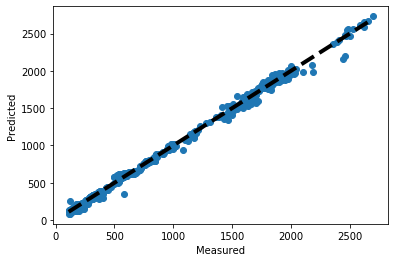

In [223]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Low

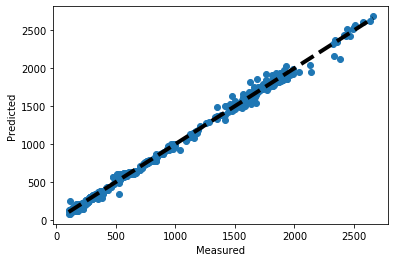

In [224]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Open

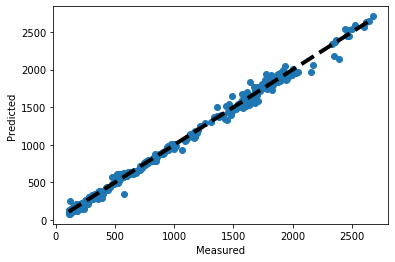

In [225]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[2], y_pred_mod[2])
ax.plot([y_test_mod[2].min(),y_test_mod[2].max()], [y_test_mod[2].min(), y_test_mod[2].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Close

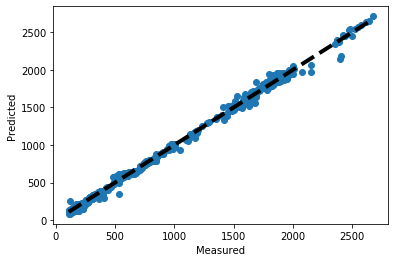

In [226]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[3], y_pred_mod[3])
ax.plot([y_test_mod[3].min(),y_test_mod[3].max()], [y_test_mod[3].min(), y_test_mod[3].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [227]:
### Regression Complete

### Applying RNN

In [228]:
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [229]:
df1=pd.read_csv('dataset_target.csv')

In [230]:
print(df1.head())

         Date        High         Low        Open       Close    Volume  \
0  2009-12-31  137.279999  134.520004  137.089996  134.520004   4523000   
1  2010-01-04  136.610001  133.139999  136.250000  133.899994   7599900   
2  2010-01-05  135.479996  131.809998  133.429993  134.690002   8851900   
3  2010-01-06  134.729996  131.649994  134.600006  132.250000   7178800   
4  2010-01-07  132.320007  128.800003  132.009995  130.000000  11030200   

    Adj Close  
0  134.520004  
1  133.899994  
2  134.690002  
3  132.250000  
4  130.000000  


In [231]:
df2=pd.read_csv('dataset_target_2.csv')

In [232]:
print(df2.head())

         High         Low        Open       Close    Volume   Adj Close  \
0  137.279999  134.520004  137.089996  134.520004   4523000  134.520004   
1  136.610001  133.139999  136.250000  133.899994   7599900  133.899994   
2  135.479996  131.809998  133.429993  134.690002   8851900  134.690002   
3  134.729996  131.649994  134.600006  132.250000   7178800  132.250000   
4  132.320007  128.800003  132.009995  130.000000  11030200  130.000000   

    Moving_av  Increase_in_vol  Increase_in_adj_close        Date  
0  134.520004              0.0               0.000000  2009-12-31  
1  134.209999        3076900.0              -0.620010  2010-01-04  
2  134.370000        1252000.0               0.790009  2010-01-05  
3  133.840000       -1673100.0              -2.440002  2010-01-06  
4  133.072000        3851400.0              -2.250000  2010-01-07  


In [233]:
df_main=df2.drop(['Date'],axis=1)

In [234]:
print(df_main.head())

         High         Low        Open       Close    Volume   Adj Close  \
0  137.279999  134.520004  137.089996  134.520004   4523000  134.520004   
1  136.610001  133.139999  136.250000  133.899994   7599900  133.899994   
2  135.479996  131.809998  133.429993  134.690002   8851900  134.690002   
3  134.729996  131.649994  134.600006  132.250000   7178800  132.250000   
4  132.320007  128.800003  132.009995  130.000000  11030200  130.000000   

    Moving_av  Increase_in_vol  Increase_in_adj_close  
0  134.520004              0.0               0.000000  
1  134.209999        3076900.0              -0.620010  
2  134.370000        1252000.0               0.790009  
3  133.840000       -1673100.0              -2.440002  
4  133.072000        3851400.0              -2.250000  


In [235]:
print(len(df_main))

2636


In [236]:
df_train=df_main[:2200]

In [237]:
print(df_train.head())

         High         Low        Open       Close    Volume   Adj Close  \
0  137.279999  134.520004  137.089996  134.520004   4523000  134.520004   
1  136.610001  133.139999  136.250000  133.899994   7599900  133.899994   
2  135.479996  131.809998  133.429993  134.690002   8851900  134.690002   
3  134.729996  131.649994  134.600006  132.250000   7178800  132.250000   
4  132.320007  128.800003  132.009995  130.000000  11030200  130.000000   

    Moving_av  Increase_in_vol  Increase_in_adj_close  
0  134.520004              0.0               0.000000  
1  134.209999        3076900.0              -0.620010  
2  134.370000        1252000.0               0.790009  
3  133.840000       -1673100.0              -2.440002  
4  133.072000        3851400.0              -2.250000  


In [238]:
sc = MinMaxScaler(feature_range = (0, 1))


In [239]:
df_target=df_train[['High','Low','Open','Close']]

In [240]:
target_set=df_target.values

In [241]:
train_set=df_train.values

In [242]:
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

In [243]:
X_train = []
y_train = []
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i,:])
    y_train.append(target_set_scaled[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)



In [244]:
print(X_train.shape)

(2150, 50, 9)


In [245]:
print(y_train.shape)

(2150, 4)


In [249]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
def model():
    mod=Sequential()
    mod.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 9)))
    mod.add(Dropout(0.2))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
   
    mod.add((LSTM(units = 64)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 16, activation='tanh')))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 4, activation='tanh')))
    mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])
    mod.summary()
    
    return mod

In [250]:
RNN_model=model()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 50, 64)            18944     
_________________________________________________________________
dropout_26 (Dropout)         (None, 50, 64)            0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 50, 64)            256       
_________________________________________________________________
lstm_29 (LSTM)               (None, 50, 64)            33024     
_________________________________________________________________
dropout_27 (Dropout)         (None, 50, 64)            0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 50, 64)            256       
_________________________________________________________________
lstm_30 (LSTM)               (None, 64)              

In [251]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='./RNN_model.h5',
                                           monitor='mean_squared_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto',
                                           save_freq='epoch')
RNN_model.fit(X_train, y_train, epochs = 2000, batch_size = 32,callbacks=[callback])

Train on 2150 samples
Epoch 1/2000
2150/2150 [==============================] - 8s 4ms/sample - loss: 0.1472 - accuracy: 0.2884 - mean_squared_error: 0.1472
Epoch 2/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0161 - accuracy: 0.3400 - mean_squared_error: 0.0161
Epoch 3/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0111 - accuracy: 0.2944 - mean_squared_error: 0.0111
Epoch 4/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0089 - accuracy: 0.2884 - mean_squared_error: 0.0089
Epoch 5/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0077 - accuracy: 0.3005 - mean_squared_error: 0.0077
Epoch 6/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0073 - accuracy: 0.2967 - mean_squared_error: 0.0073
Epoch 7/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0072 - accuracy: 0.2860 - mean_squared_error: 0.0072
Epoch 8/2000
2150/2150 [=========

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0040 - accuracy: 0.2888 - mean_squared_error: 0.0040
Epoch 62/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0047 - accuracy: 0.2874 - mean_squared_error: 0.0047
Epoch 63/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0040 - accuracy: 0.3149 - mean_squared_error: 0.0040
Epoch 64/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0042 - accuracy: 0.3112 - mean_squared_error: 0.0042
Epoch 65/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0037 - accuracy: 0.3367 - mean_squared_error: 0.0037
Epoch 66/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0031 - accuracy: 0.3247 - mean_squared_error: 0.0031
Epoch 67/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0038 - accuracy: 0.3330 - mean_squared_error: 0.0038
Epoch 68/2000
2150/2150 [==============================] - 4s 

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0034 - accuracy: 0.2879 - mean_squared_error: 0.0034
Epoch 122/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0032 - accuracy: 0.2744 - mean_squared_error: 0.0032
Epoch 123/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0026 - accuracy: 0.3135 - mean_squared_error: 0.0026
Epoch 124/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0039 - accuracy: 0.2893 - mean_squared_error: 0.0039
Epoch 125/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0033 - accuracy: 0.2833 - mean_squared_error: 0.0033
Epoch 126/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0051 - accuracy: 0.2260 - mean_squared_error: 0.0051
Epoch 127/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0038 - accuracy: 0.2619 - mean_squared_error: 0.0038
Epoch 128/2000
2150/2150 [==============================

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0032 - accuracy: 0.3112 - mean_squared_error: 0.0032
Epoch 181/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0030 - accuracy: 0.2772 - mean_squared_error: 0.0030
Epoch 182/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0026 - accuracy: 0.2898 - mean_squared_error: 0.0026
Epoch 183/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0023 - accuracy: 0.3293 - mean_squared_error: 0.0023
Epoch 184/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0030 - accuracy: 0.2902 - mean_squared_error: 0.0030
Epoch 185/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0024 - accuracy: 0.3000 - mean_squared_error: 0.0024
Epoch 186/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0026 - accuracy: 0.2749 - mean_squared_error: 0.0026
Epoch 187/2000
2150/2150 [==============================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0025 - accuracy: 0.3000 - mean_squared_error: 0.0025
Epoch 240/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0022 - accuracy: 0.3065 - mean_squared_error: 0.0022
Epoch 241/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0024 - accuracy: 0.2600 - mean_squared_error: 0.0024
Epoch 242/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0025 - accuracy: 0.3116 - mean_squared_error: 0.0025
Epoch 243/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0028 - accuracy: 0.2809 - mean_squared_error: 0.0028
Epoch 244/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0027 - accuracy: 0.3042 - mean_squared_error: 0.0027
Epoch 245/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0024 - accuracy: 0.2935 - mean_squared_error: 0.0024
Epoch 246/2000
2150/2150 [==============================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0019 - accuracy: 0.3200 - mean_squared_error: 0.0019
Epoch 299/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0028 - accuracy: 0.2367 - mean_squared_error: 0.0028
Epoch 300/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0025 - accuracy: 0.2526 - mean_squared_error: 0.0025
Epoch 301/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0031 - accuracy: 0.2447 - mean_squared_error: 0.0031
Epoch 302/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0024 - accuracy: 0.3200 - mean_squared_error: 0.0024
Epoch 303/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0026 - accuracy: 0.2814 - mean_squared_error: 0.0026
Epoch 304/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0026 - accuracy: 0.3330 - mean_squared_error: 0.0026
Epoch 305/2000
2150/2150 [==============================

2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0028 - accuracy: 0.3037 - mean_squared_error: 0.0028
Epoch 358/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0018 - accuracy: 0.2726 - mean_squared_error: 0.0018
Epoch 359/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0018 - accuracy: 0.2958 - mean_squared_error: 0.0018
Epoch 360/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0021 - accuracy: 0.2967 - mean_squared_error: 0.0021
Epoch 361/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0021 - accuracy: 0.3009 - mean_squared_error: 0.0021
Epoch 362/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0022 - accuracy: 0.2591 - mean_squared_error: 0.0022
Epoch 363/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0022 - accuracy: 0.3405 - mean_squared_error: 0.0022
Epoch 364/2000
2150/2150 [==============================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0024 - accuracy: 0.3047 - mean_squared_error: 0.0024
Epoch 417/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.3093 - mean_squared_error: 0.0019
Epoch 418/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.2670 - mean_squared_error: 0.0018
Epoch 419/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0021 - accuracy: 0.2707 - mean_squared_error: 0.0021
Epoch 420/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0016 - accuracy: 0.3107 - mean_squared_error: 0.0016
Epoch 421/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0026 - accuracy: 0.3033 - mean_squared_error: 0.0026
Epoch 422/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0025 - accuracy: 0.2828 - mean_squared_error: 0.0025
Epoch 423/2000
2150/2150 [==============================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0025 - accuracy: 0.2935 - mean_squared_error: 0.0025
Epoch 476/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0022 - accuracy: 0.2902 - mean_squared_error: 0.0022
Epoch 477/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.2684 - mean_squared_error: 0.0019
Epoch 478/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0020 - accuracy: 0.2651 - mean_squared_error: 0.0020
Epoch 479/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0013 - accuracy: 0.3033 - mean_squared_error: 0.0013
Epoch 480/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0022 - accuracy: 0.3060 - mean_squared_error: 0.0022
Epoch 481/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0023 - accuracy: 0.2944 - mean_squared_error: 0.0023
Epoch 482/2000
2150/2150 [==============================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.3405 - mean_squared_error: 0.0018
Epoch 535/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.3079 - mean_squared_error: 0.0019
Epoch 536/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.3191 - mean_squared_error: 0.0019
Epoch 537/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.3623 - mean_squared_error: 0.0016
Epoch 538/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0017 - accuracy: 0.2893 - mean_squared_error: 0.0017
Epoch 539/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0024 - accuracy: 0.3274 - mean_squared_error: 0.0024
Epoch 540/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.2940 - mean_squared_error: 0.0019
Epoch 541/2000
2150/2150 [==============================

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0017 - accuracy: 0.3149 - mean_squared_error: 0.0017
Epoch 594/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0015 - accuracy: 0.3405 - mean_squared_error: 0.0015
Epoch 595/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0016 - accuracy: 0.3112 - mean_squared_error: 0.0016
Epoch 596/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0019 - accuracy: 0.3219 - mean_squared_error: 0.0019
Epoch 597/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0016 - accuracy: 0.3330 - mean_squared_error: 0.0016
Epoch 598/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0016 - accuracy: 0.3302 - mean_squared_error: 0.0016
Epoch 599/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0015 - accuracy: 0.2851 - mean_squared_error: 0.0015
Epoch 600/2000
2150/2150 [==============================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0023 - accuracy: 0.2977 - mean_squared_error: 0.0023
Epoch 653/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0019 - accuracy: 0.3307 - mean_squared_error: 0.0019
Epoch 654/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 0.3409 - mean_squared_error: 0.0014
Epoch 655/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0025 - accuracy: 0.3233 - mean_squared_error: 0.0025
Epoch 656/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0018 - accuracy: 0.3177 - mean_squared_error: 0.0018
Epoch 657/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0013 - accuracy: 0.3153 - mean_squared_error: 0.0013
Epoch 658/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0013 - accuracy: 0.3074 - mean_squared_error: 0.0013
Epoch 659/2000
2150/2150 [==============================

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0016 - accuracy: 0.3307 - mean_squared_error: 0.0016
Epoch 712/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0022 - accuracy: 0.2656 - mean_squared_error: 0.0022
Epoch 713/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0019 - accuracy: 0.3242 - mean_squared_error: 0.0019
Epoch 714/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0012 - accuracy: 0.3474 - mean_squared_error: 0.0012
Epoch 715/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0020 - accuracy: 0.3260 - mean_squared_error: 0.0020
Epoch 716/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0022 - accuracy: 0.3381 - mean_squared_error: 0.0022
Epoch 717/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0019 - accuracy: 0.3344 - mean_squared_error: 0.0019
Epoch 718/2000
2150/2150 [==============================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0020 - accuracy: 0.3558 - mean_squared_error: 0.0020
Epoch 771/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0016 - accuracy: 0.3651 - mean_squared_error: 0.0016
Epoch 772/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0017 - accuracy: 0.3428 - mean_squared_error: 0.0017
Epoch 773/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0017 - accuracy: 0.3758 - mean_squared_error: 0.0017
Epoch 774/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.3214 - mean_squared_error: 0.0018
Epoch 775/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0022 - accuracy: 0.3298 - mean_squared_error: 0.0022
Epoch 776/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0017 - accuracy: 0.3367 - mean_squared_error: 0.0017
Epoch 777/2000
2150/2150 [==============================

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0020 - accuracy: 0.3526 - mean_squared_error: 0.0020
Epoch 830/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0014 - accuracy: 0.3674 - mean_squared_error: 0.0014
Epoch 831/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0015 - accuracy: 0.4056 - mean_squared_error: 0.0015
Epoch 832/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0019 - accuracy: 0.2991 - mean_squared_error: 0.0019
Epoch 833/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.3716 - mean_squared_error: 0.0018
Epoch 834/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0016 - accuracy: 0.3600 - mean_squared_error: 0.0016
Epoch 835/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0017 - accuracy: 0.3121 - mean_squared_error: 0.0017
Epoch 836/2000
2150/2150 [==============================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0022 - accuracy: 0.3335 - mean_squared_error: 0.0022
Epoch 889/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0022 - accuracy: 0.4065 - mean_squared_error: 0.0022
Epoch 890/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0020 - accuracy: 0.3423 - mean_squared_error: 0.0020
Epoch 891/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0070 - accuracy: 0.3409 - mean_squared_error: 0.0070
Epoch 892/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0027 - accuracy: 0.2963 - mean_squared_error: 0.0027
Epoch 893/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0028 - accuracy: 0.3130 - mean_squared_error: 0.0028
Epoch 894/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0025 - accuracy: 0.3316 - mean_squared_error: 0.0025
Epoch 895/2000
2150/2150 [==============================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0020 - accuracy: 0.4116 - mean_squared_error: 0.0020
Epoch 948/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0017 - accuracy: 0.3800 - mean_squared_error: 0.0017
Epoch 949/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0018 - accuracy: 0.3563 - mean_squared_error: 0.0018
Epoch 950/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0030 - accuracy: 0.3595 - mean_squared_error: 0.0030
Epoch 951/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0014 - accuracy: 0.4363 - mean_squared_error: 0.0014
Epoch 952/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0017 - accuracy: 0.3540 - mean_squared_error: 0.0017
Epoch 953/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0025 - accuracy: 0.2912 - mean_squared_error: 0.0025
Epoch 954/2000
2150/2150 [==============================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0019 - accuracy: 0.3870 - mean_squared_error: 0.0019
Epoch 1007/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0019 - accuracy: 0.3767 - mean_squared_error: 0.0019
Epoch 1008/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0025 - accuracy: 0.3288 - mean_squared_error: 0.0025
Epoch 1009/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0022 - accuracy: 0.3530 - mean_squared_error: 0.0022
Epoch 1010/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.3567 - mean_squared_error: 0.0018
Epoch 1011/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0019 - accuracy: 0.3995 - mean_squared_error: 0.0019
Epoch 1012/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0023 - accuracy: 0.2772 - mean_squared_error: 0.0023
Epoch 1013/2000
2150/2150 [=======================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0018 - accuracy: 0.3981 - mean_squared_error: 0.0018
Epoch 1066/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0025 - accuracy: 0.4149 - mean_squared_error: 0.0025
Epoch 1067/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0020 - accuracy: 0.4079 - mean_squared_error: 0.0020
Epoch 1068/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0027 - accuracy: 0.3791 - mean_squared_error: 0.0027
Epoch 1069/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0025 - accuracy: 0.3856 - mean_squared_error: 0.0025
Epoch 1070/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0020 - accuracy: 0.3926 - mean_squared_error: 0.0020
Epoch 1071/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0021 - accuracy: 0.4000 - mean_squared_error: 0.0021
Epoch 1072/2000
2150/2150 [=======================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0018 - accuracy: 0.4172 - mean_squared_error: 0.0018
Epoch 1125/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0023 - accuracy: 0.3679 - mean_squared_error: 0.0023
Epoch 1126/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0019 - accuracy: 0.4642 - mean_squared_error: 0.0019
Epoch 1127/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0019 - accuracy: 0.4512 - mean_squared_error: 0.0019
Epoch 1128/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0017 - accuracy: 0.4349 - mean_squared_error: 0.0017
Epoch 1129/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0017 - accuracy: 0.4065 - mean_squared_error: 0.0017
Epoch 1130/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0017 - accuracy: 0.4470 - mean_squared_error: 0.0017
Epoch 1131/2000
2150/2150 [=======================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0021 - accuracy: 0.4326 - mean_squared_error: 0.0021
Epoch 1184/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0017 - accuracy: 0.4274 - mean_squared_error: 0.0017
Epoch 1185/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0016 - accuracy: 0.4014 - mean_squared_error: 0.0016
Epoch 1186/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.4167 - mean_squared_error: 0.0019
Epoch 1187/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0025 - accuracy: 0.3763 - mean_squared_error: 0.0025
Epoch 1188/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0017 - accuracy: 0.4433 - mean_squared_error: 0.0017
Epoch 1189/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.4428 - mean_squared_error: 0.0018
Epoch 1190/2000
2150/2150 [=======================

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0016 - accuracy: 0.4093 - mean_squared_error: 0.0016
Epoch 1243/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0022 - accuracy: 0.4163 - mean_squared_error: 0.0022
Epoch 1244/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0019 - accuracy: 0.4167 - mean_squared_error: 0.0019
Epoch 1245/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 0.4367 - mean_squared_error: 0.0014
Epoch 1246/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0026 - accuracy: 0.3781 - mean_squared_error: 0.0026
Epoch 1247/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0020 - accuracy: 0.4144 - mean_squared_error: 0.0020
Epoch 1248/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0016 - accuracy: 0.3888 - mean_squared_error: 0.0016
Epoch 1249/2000
2150/2150 [=======================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0013 - accuracy: 0.4195 - mean_squared_error: 0.0013
Epoch 1302/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0016 - accuracy: 0.4521 - mean_squared_error: 0.0016
Epoch 1303/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0015 - accuracy: 0.4181 - mean_squared_error: 0.0015
Epoch 1304/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0020 - accuracy: 0.4098 - mean_squared_error: 0.0020
Epoch 1305/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0023 - accuracy: 0.3902 - mean_squared_error: 0.0023
Epoch 1306/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0021 - accuracy: 0.4074 - mean_squared_error: 0.0021
Epoch 1307/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.4353 - mean_squared_error: 0.0018
Epoch 1308/2000
2150/2150 [=======================

2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0020 - accuracy: 0.4153 - mean_squared_error: 0.0020
Epoch 1361/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.4209 - mean_squared_error: 0.0018
Epoch 1362/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0021 - accuracy: 0.4009 - mean_squared_error: 0.0021
Epoch 1363/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0017 - accuracy: 0.4270 - mean_squared_error: 0.0017
Epoch 1364/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0015 - accuracy: 0.4781 - mean_squared_error: 0.0015
Epoch 1365/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0016 - accuracy: 0.4591 - mean_squared_error: 0.0016
Epoch 1366/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.4619 - mean_squared_error: 0.0018
Epoch 1367/2000
2150/2150 [=======================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.3930 - mean_squared_error: 0.0018
Epoch 1420/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0021 - accuracy: 0.3842 - mean_squared_error: 0.0021
Epoch 1421/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.4414 - mean_squared_error: 0.0016
Epoch 1422/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0020 - accuracy: 0.3930 - mean_squared_error: 0.0020
Epoch 1423/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.4316 - mean_squared_error: 0.0018
Epoch 1424/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0013 - accuracy: 0.4274 - mean_squared_error: 0.0013
Epoch 1425/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.4233 - mean_squared_error: 0.0016
Epoch 1426/2000
2150/2150 [=======================

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0023 - accuracy: 0.4553 - mean_squared_error: 0.0023
Epoch 1479/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.4158 - mean_squared_error: 0.0018
Epoch 1480/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0017 - accuracy: 0.4307 - mean_squared_error: 0.0017
Epoch 1481/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0017 - accuracy: 0.4702 - mean_squared_error: 0.0017
Epoch 1482/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0014 - accuracy: 0.4279 - mean_squared_error: 0.0014
Epoch 1483/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0014 - accuracy: 0.4549 - mean_squared_error: 0.0014
Epoch 1484/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.4470 - mean_squared_error: 0.0019
Epoch 1485/2000
2150/2150 [=======================

2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0016 - accuracy: 0.4312 - mean_squared_error: 0.0016
Epoch 1538/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0017 - accuracy: 0.4265 - mean_squared_error: 0.0017
Epoch 1539/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0018 - accuracy: 0.4433 - mean_squared_error: 0.0018
Epoch 1540/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0015 - accuracy: 0.4158 - mean_squared_error: 0.0015
Epoch 1541/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0023 - accuracy: 0.4544 - mean_squared_error: 0.0023
Epoch 1542/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0015 - accuracy: 0.4428 - mean_squared_error: 0.0015
Epoch 1543/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.4451 - mean_squared_error: 0.0019
Epoch 1544/2000
2150/2150 [=======================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.4623 - mean_squared_error: 0.0016
Epoch 1597/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0021 - accuracy: 0.4330 - mean_squared_error: 0.0021
Epoch 1598/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0010 - accuracy: 0.4484 - mean_squared_error: 0.0010
Epoch 1599/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0019 - accuracy: 0.4493 - mean_squared_error: 0.0019
Epoch 1600/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.4423 - mean_squared_error: 0.0018
Epoch 1601/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0014 - accuracy: 0.4707 - mean_squared_error: 0.0014
Epoch 1602/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0012 - accuracy: 0.4526 - mean_squared_error: 0.0012
Epoch 1603/2000
2150/2150 [=======================

2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0019 - accuracy: 0.4251 - mean_squared_error: 0.0019
Epoch 1656/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0021 - accuracy: 0.4293 - mean_squared_error: 0.0021
Epoch 1657/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0020 - accuracy: 0.4409 - mean_squared_error: 0.0020
Epoch 1658/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0024 - accuracy: 0.4112 - mean_squared_error: 0.0024
Epoch 1659/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0014 - accuracy: 0.4256 - mean_squared_error: 0.0014
Epoch 1660/2000
2150/2150 [==============================] - 3s 2ms/sample - loss: 0.0017 - accuracy: 0.4507 - mean_squared_error: 0.0017
Epoch 1661/2000
2150/2150 [==============================] - 3s 1ms/sample - loss: 0.0021 - accuracy: 0.4163 - mean_squared_error: 0.0021
Epoch 1662/2000
2150/2150 [=======================

2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0015 - accuracy: 0.4344 - mean_squared_error: 0.0015 1s - loss: 0.0012 - accuracy: 0.4522 - mean_square
Epoch 1715/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0017 - accuracy: 0.4209 - mean_squared_error: 0.0017
Epoch 1716/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.3972 - mean_squared_error: 0.0016
Epoch 1717/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0011 - accuracy: 0.4633 - mean_squared_error: 0.0011
Epoch 1718/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0021 - accuracy: 0.4521 - mean_squared_error: 0.0021
Epoch 1719/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.4326 - mean_squared_error: 0.0018
Epoch 1720/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0014 - accuracy: 0.3986 - mean_squared_error: 0.0014

2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0016 - accuracy: 0.4340 - mean_squared_error: 0.0016
Epoch 1774/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0013 - accuracy: 0.4563 - mean_squared_error: 0.0013
Epoch 1775/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0018 - accuracy: 0.4265 - mean_squared_error: 0.0018
Epoch 1776/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0017 - accuracy: 0.4233 - mean_squared_error: 0.0017
Epoch 1777/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0015 - accuracy: 0.4516 - mean_squared_error: 0.0015
Epoch 1778/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.3856 - mean_squared_error: 0.0018
Epoch 1779/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.4405 - mean_squared_error: 0.0018 0s - loss: 0.0017 - accuracy: 0.4395 - mean_square

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0015 - accuracy: 0.4344 - mean_squared_error: 0.0015
Epoch 1832/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0014 - accuracy: 0.4874 - mean_squared_error: 0.0014
Epoch 1833/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0012 - accuracy: 0.4637 - mean_squared_error: 0.0012
Epoch 1834/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0020 - accuracy: 0.4493 - mean_squared_error: 0.0020
Epoch 1835/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0019 - accuracy: 0.4274 - mean_squared_error: 0.0019
Epoch 1836/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.4600 - mean_squared_error: 0.0016
Epoch 1837/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.4460 - mean_squared_error: 0.0016
Epoch 1838/2000
2150/2150 [=======================

2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0016 - accuracy: 0.4502 - mean_squared_error: 0.0016
Epoch 1891/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0019 - accuracy: 0.4274 - mean_squared_error: 0.0019
Epoch 1892/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0017 - accuracy: 0.4051 - mean_squared_error: 0.0017
Epoch 1893/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0024 - accuracy: 0.3544 - mean_squared_error: 0.0024
Epoch 1894/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0020 - accuracy: 0.4502 - mean_squared_error: 0.0020
Epoch 1895/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0018 - accuracy: 0.4633 - mean_squared_error: 0.0018
Epoch 1896/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0015 - accuracy: 0.4195 - mean_squared_error: 0.0015
Epoch 1897/2000
2150/2150 [=======================

2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.4437 - mean_squared_error: 0.0016
Epoch 1950/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0015 - accuracy: 0.4553 - mean_squared_error: 0.0015
Epoch 1951/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0020 - accuracy: 0.4033 - mean_squared_error: 0.0020
Epoch 1952/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.4484 - mean_squared_error: 0.0016
Epoch 1953/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0016 - accuracy: 0.4167 - mean_squared_error: 0.0016
Epoch 1954/2000
2150/2150 [==============================] - 4s 2ms/sample - loss: 0.0012 - accuracy: 0.4805 - mean_squared_error: 0.0012
Epoch 1955/2000
2150/2150 [==============================] - 5s 2ms/sample - loss: 0.0022 - accuracy: 0.4363 - mean_squared_error: 0.0022
Epoch 1956/2000
2150/2150 [=======================

In [252]:
df_test=df_main[2200:]

In [253]:
df_target_test=df_test[['High','Low','Open','Close']]

In [260]:
target_set_test=df_target_test.values

In [261]:
test_set=df_test.values

In [266]:
test_set_scaled = sc.fit_transform(test_set)
target_set_scaled = sc.fit_transform(target_set_test)

In [267]:
X_test = []
y_test = []
for i in range(50,len(test_set)):
    X_test.append(test_set_scaled[i-50:i,:])
    y_test.append(target_set_scaled[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)



In [269]:
predicted_stock_price = RNN_model.predict(X_test)

In [271]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [273]:
predicted_stock_price

array([[1690.364 , 1610.5382, 1643.4277, 1643.8912],
       [1687.384 , 1607.5323, 1640.3225, 1640.7366],
       [1688.7346, 1608.965 , 1641.6777, 1642.0984],
       ...,
       [2567.6138, 2510.703 , 2522.8406, 2538.787 ],
       [2576.5056, 2519.5195, 2531.803 , 2547.9304],
       [2578.5886, 2521.65  , 2533.9177, 2550.0896]], dtype=float32)

### High

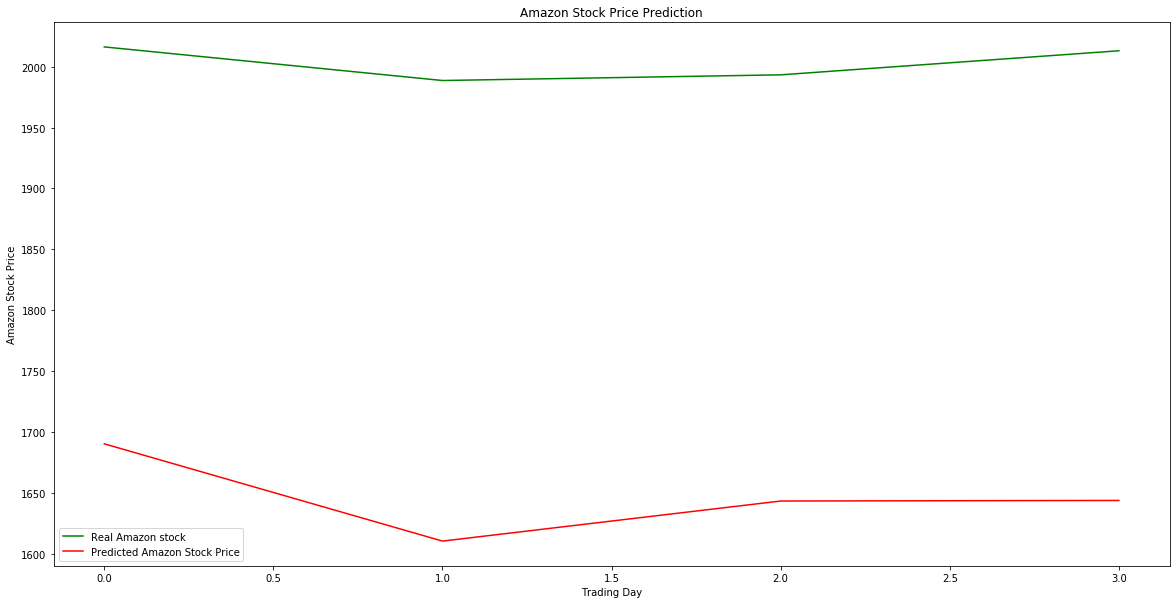

In [275]:
plt.figure(figsize=(20,10))
plt.plot(target_set_test[0], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[0], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

### Low

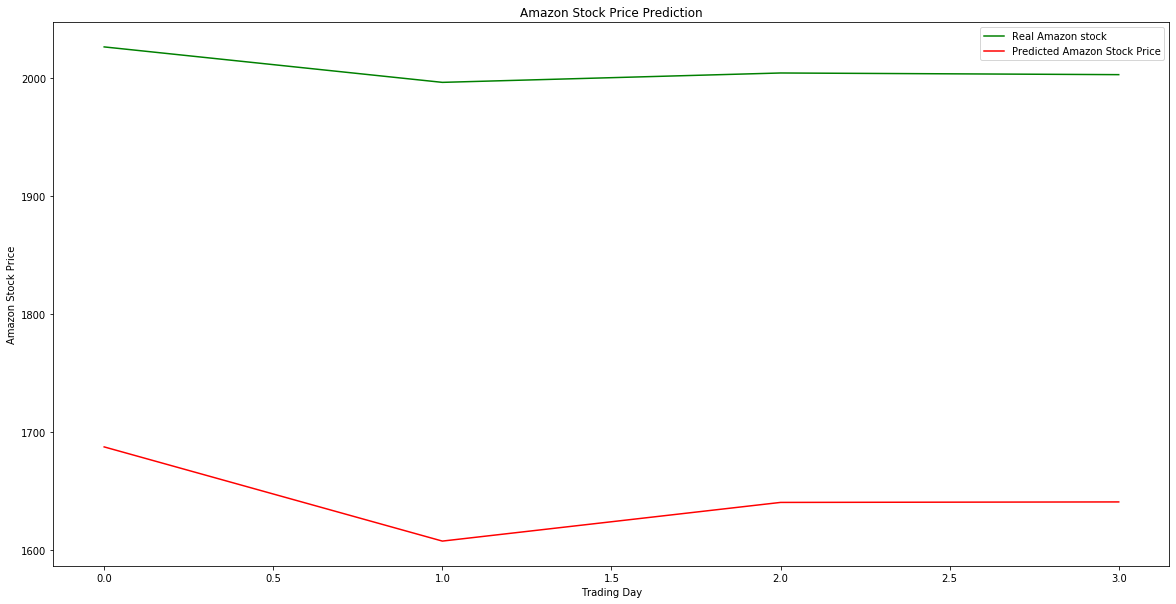

In [276]:
plt.figure(figsize=(20,10))
plt.plot(target_set_test[1], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[1], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

### Open

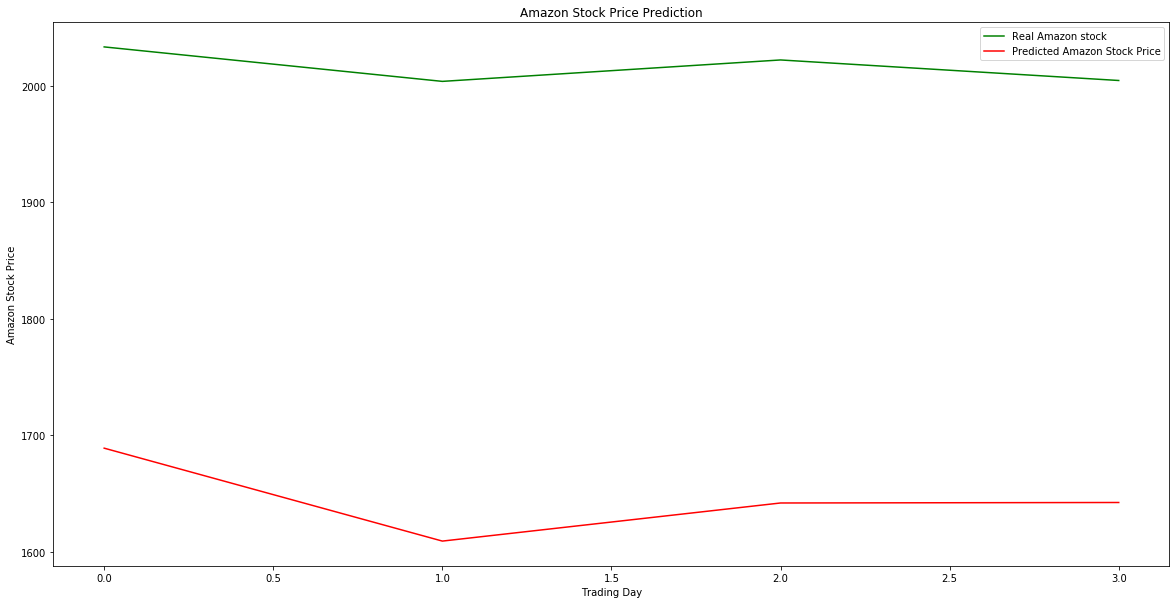

In [277]:
plt.figure(figsize=(20,10))
plt.plot(target_set_test[2], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[2], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

### Close

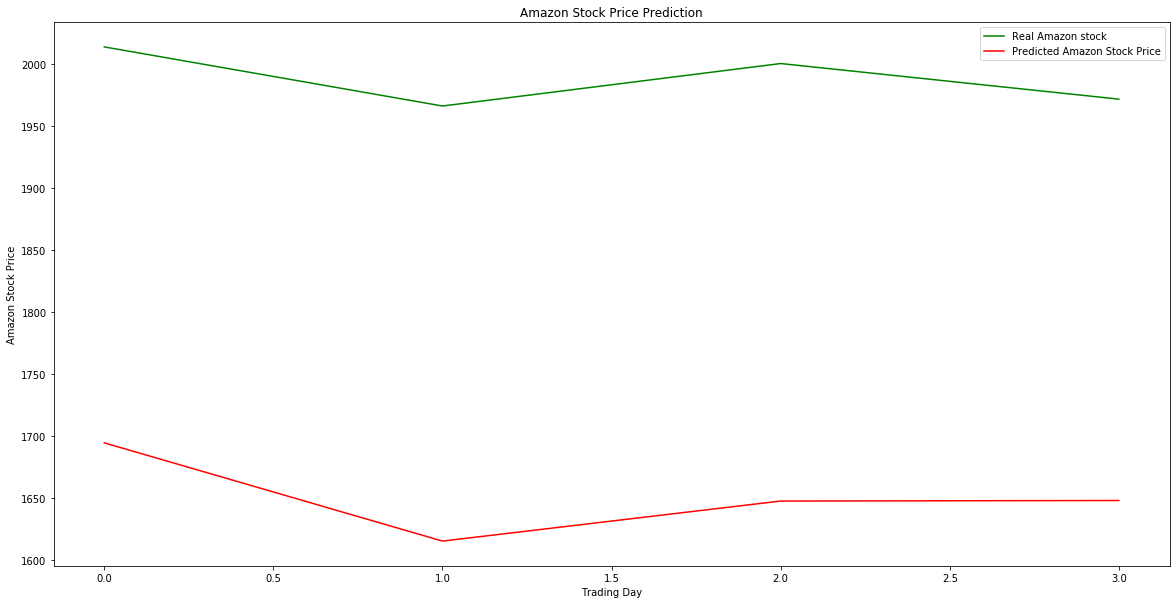

In [278]:
plt.figure(figsize=(20,10))
plt.plot(target_set_test[3], color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price[3], color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

### All over

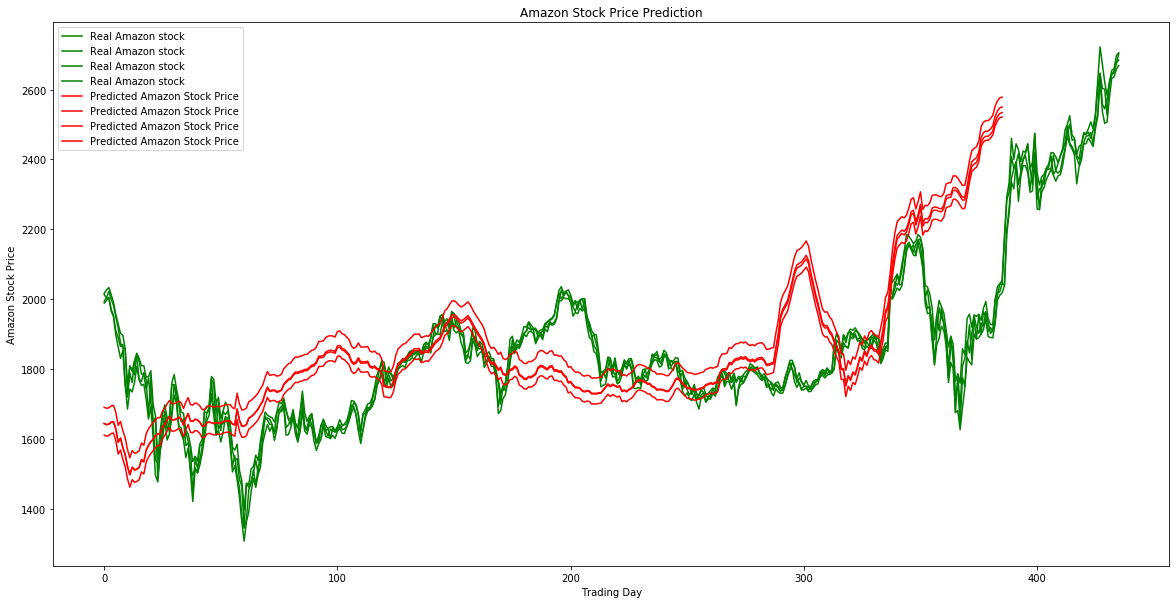

In [279]:
plt.figure(figsize=(20,10))
plt.plot(target_set_test, color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

In [280]:
### RNN Complete

### Covering ANN

In [444]:
import pandas as pd

In [445]:
df1=pd.read_csv("dataset_target_2.csv")
df2=pd.read_csv("dataset_target.csv")
df3=pd.read_csv('Dataset_main.csv')

In [446]:
df3.fillna(0, inplace=True)

In [447]:
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

In [448]:
col_y=y_df.columns
print(col_y)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [449]:
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)

In [450]:
Drop_cols=col_y

In [451]:
Drop_cols=Drop_cols.tolist()

In [452]:
Drop_cols.append('Date')


In [453]:
X_df=df3.drop(Drop_cols,axis=1)

In [454]:
X=X_df.values

In [455]:
saved_model_regressor=tf.keras.models.load_model('Regressor_model.h5')

In [456]:
Regressor_prediction=saved_model_regressor(X)

In [457]:
Regressor_prediction

<tf.Tensor: shape=(2636, 4), dtype=float32, numpy=
array([[ 133.82632 ,  131.14365 ,  132.12865 ,  132.77518 ],
       [ 128.77527 ,  126.161415,  127.129295,  127.74392 ],
       [ 132.49725 ,  129.83269 ,  130.81319 ,  131.45132 ],
       ...,
       [2723.3738  , 2685.4128  , 2695.1738  , 2712.1775  ],
       [2555.7427  , 2520.0652  , 2529.258   , 2545.203   ],
       [2904.4836  , 2864.0552  , 2874.43    , 2892.5776  ]],
      dtype=float32)>

In [458]:
Regressor_prediction.shape

TensorShape([2636, 4])

In [459]:
import numpy as np
y_pred_mod=[]


for i in range(0,4):
    j=0
    y_pred_temp=[]
   
    
    while(j<len(Regressor_prediction)):
        y_pred_temp.append(Regressor_prediction[j][i])
        
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    

In [460]:
y_pred_mod

[array([ 133.82632,  128.77527,  132.49725, ..., 2723.3738 , 2555.7427 ,
        2904.4836 ], dtype=float32),
 array([ 131.14365 ,  126.161415,  129.83269 , ..., 2685.4128  ,
        2520.0652  , 2864.0552  ], dtype=float32),
 array([ 132.12865 ,  127.129295,  130.81319 , ..., 2695.1738  ,
        2529.258   , 2874.43    ], dtype=float32),
 array([ 132.77518,  127.74392,  131.45132, ..., 2712.1775 , 2545.203  ,
        2892.5776 ], dtype=float32)]

In [461]:
Y_pred=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_pred_mod[2],y_pred_mod[3])),columns=['High_regress','Low_regress','Open_regress','Close_regress'])

In [462]:
Y_pred.head()

,High_regress,Low_regress,Open_regress,Close_regress
0,133.826324,131.143646,132.128647,132.775177
1,128.775269,126.161415,127.129295,127.743919
2,132.497253,129.832687,130.813187,131.451324
3,172.551865,169.341629,170.457855,171.348999
4,125.700699,123.128731,124.086189,124.681396


In [463]:
Y_pred.to_csv('Regressor_results.csv',index=False)

In [464]:
df_main=df1.drop(['Date'],axis=1)

In [465]:
main_set=df_main.values

In [466]:
main_set_scaled = sc.transform(main_set)

In [467]:
X_test = []

for i in range(50,len(main_set)):
    X_test.append(main_set[i-50:i,:])
    
X_test = np.array(X_test)



In [468]:
saved_model_RNN=tf.keras.models.load_model('RNN_model.h5')

In [469]:
RNN_prediction=RNN_model.predict(X_test)

In [470]:
len(RNN_prediction)

2586

In [471]:
import numpy as np
y_pred_mod=[]


for i in range(0,4):
    j=0
    y_pred_temp=[]
   
    
    while(j<len(RNN_prediction)):
        y_pred_temp.append(RNN_prediction[j][i])
        
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    

In [472]:
Y_pred=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_pred_mod[2],y_pred_mod[3])),columns=['High_RNN','Low_RNN','Open_RNN','Close_RNN'])

In [473]:
Y_pred.head()

,High_RNN,Low_RNN,Open_RNN,Close_RNN
0,-0.730683,-0.702834,-0.701247,-0.697405
1,0.331519,0.342548,0.321756,0.335208
2,-0.249825,-0.212222,-0.208299,-0.198306
3,-0.115043,-0.102053,-0.110373,-0.095470
4,-0.054895,-0.038586,-0.049983,-0.035920


In [474]:
Y_pred.to_csv('RNN_results.csv',index=False)

In [497]:
df1=pd.read_csv('Regressor_results.csv')
df2=pd.read_csv('RNN_results.csv')



In [498]:
df1=df1[50:]
df1.to_csv('Regressor_results_mod.csv',index=False)

In [499]:
df1=pd.read_csv('Regressor_results_mod.csv')

In [500]:
df=pd.concat([df1,df2],axis=1)

In [501]:
df.head()

,High_regress,Low_regress,Open_regress,Close_regress,High_RNN,Low_RNN,Open_RNN,Close_RNN
0,176.166031,172.906555,174.035049,174.949005,-0.730683,-0.702834,-0.701247,-0.697405
1,135.153732,132.452988,133.442474,134.097382,0.331519,0.342548,0.321756,0.335208
2,134.276260,131.587463,132.573990,133.223358,-0.249825,-0.212222,-0.208299,-0.198306
3,127.860909,125.259506,126.224289,126.833145,-0.115043,-0.102053,-0.110373,-0.095470
4,163.309052,160.224731,161.309647,162.142395,-0.054895,-0.038586,-0.049983,-0.035920


In [502]:
df1=pd.read_csv("dataset_target_2.csv")

In [509]:
target_high=[]
target_low=[]
i=50
while i<len(df1):
    target_high.append(df1.iloc[i]['High'])
    target_low.append(df1.iloc[i]['Low'])
    i+=1

In [510]:
len(target_high)

2586

In [557]:
df['Target_high']=target_high
df['Target_low']=target_low

df.to_csv('feature.csv',index=False)

In [558]:
df_main=pd.read_csv('feature.csv')

In [559]:
print(df_main.head())

   High_regress  Low_regress  Open_regress  Close_regress  High_RNN   Low_RNN  \
0    176.166031   172.906555    174.035049     174.949005 -0.730683 -0.702834   
1    135.153732   132.452988    133.442474     134.097382  0.331519  0.342548   
2    134.276260   131.587463    132.573990     133.223358 -0.249825 -0.212222   
3    127.860909   125.259506    126.224289     126.833145 -0.115043 -0.102053   
4    163.309052   160.224731    161.309647     162.142395 -0.054895 -0.038586   

   Open_RNN  Close_RNN  Target_high  Target_low  
0 -0.701247  -0.697405   132.289993  130.500000  
1  0.321756   0.335208   132.690002  131.220001  
2 -0.208299  -0.198306   132.850006  130.440002  
3 -0.110373  -0.095470   133.710007  129.660004  
4 -0.049983  -0.035920   130.960007  128.639999  


In [515]:
X_Df=df_main[['High_regress','Low_regress','Open_regress','Close_regress','High_RNN','Low_RNN','Open_RNN','Close_RNN']].values

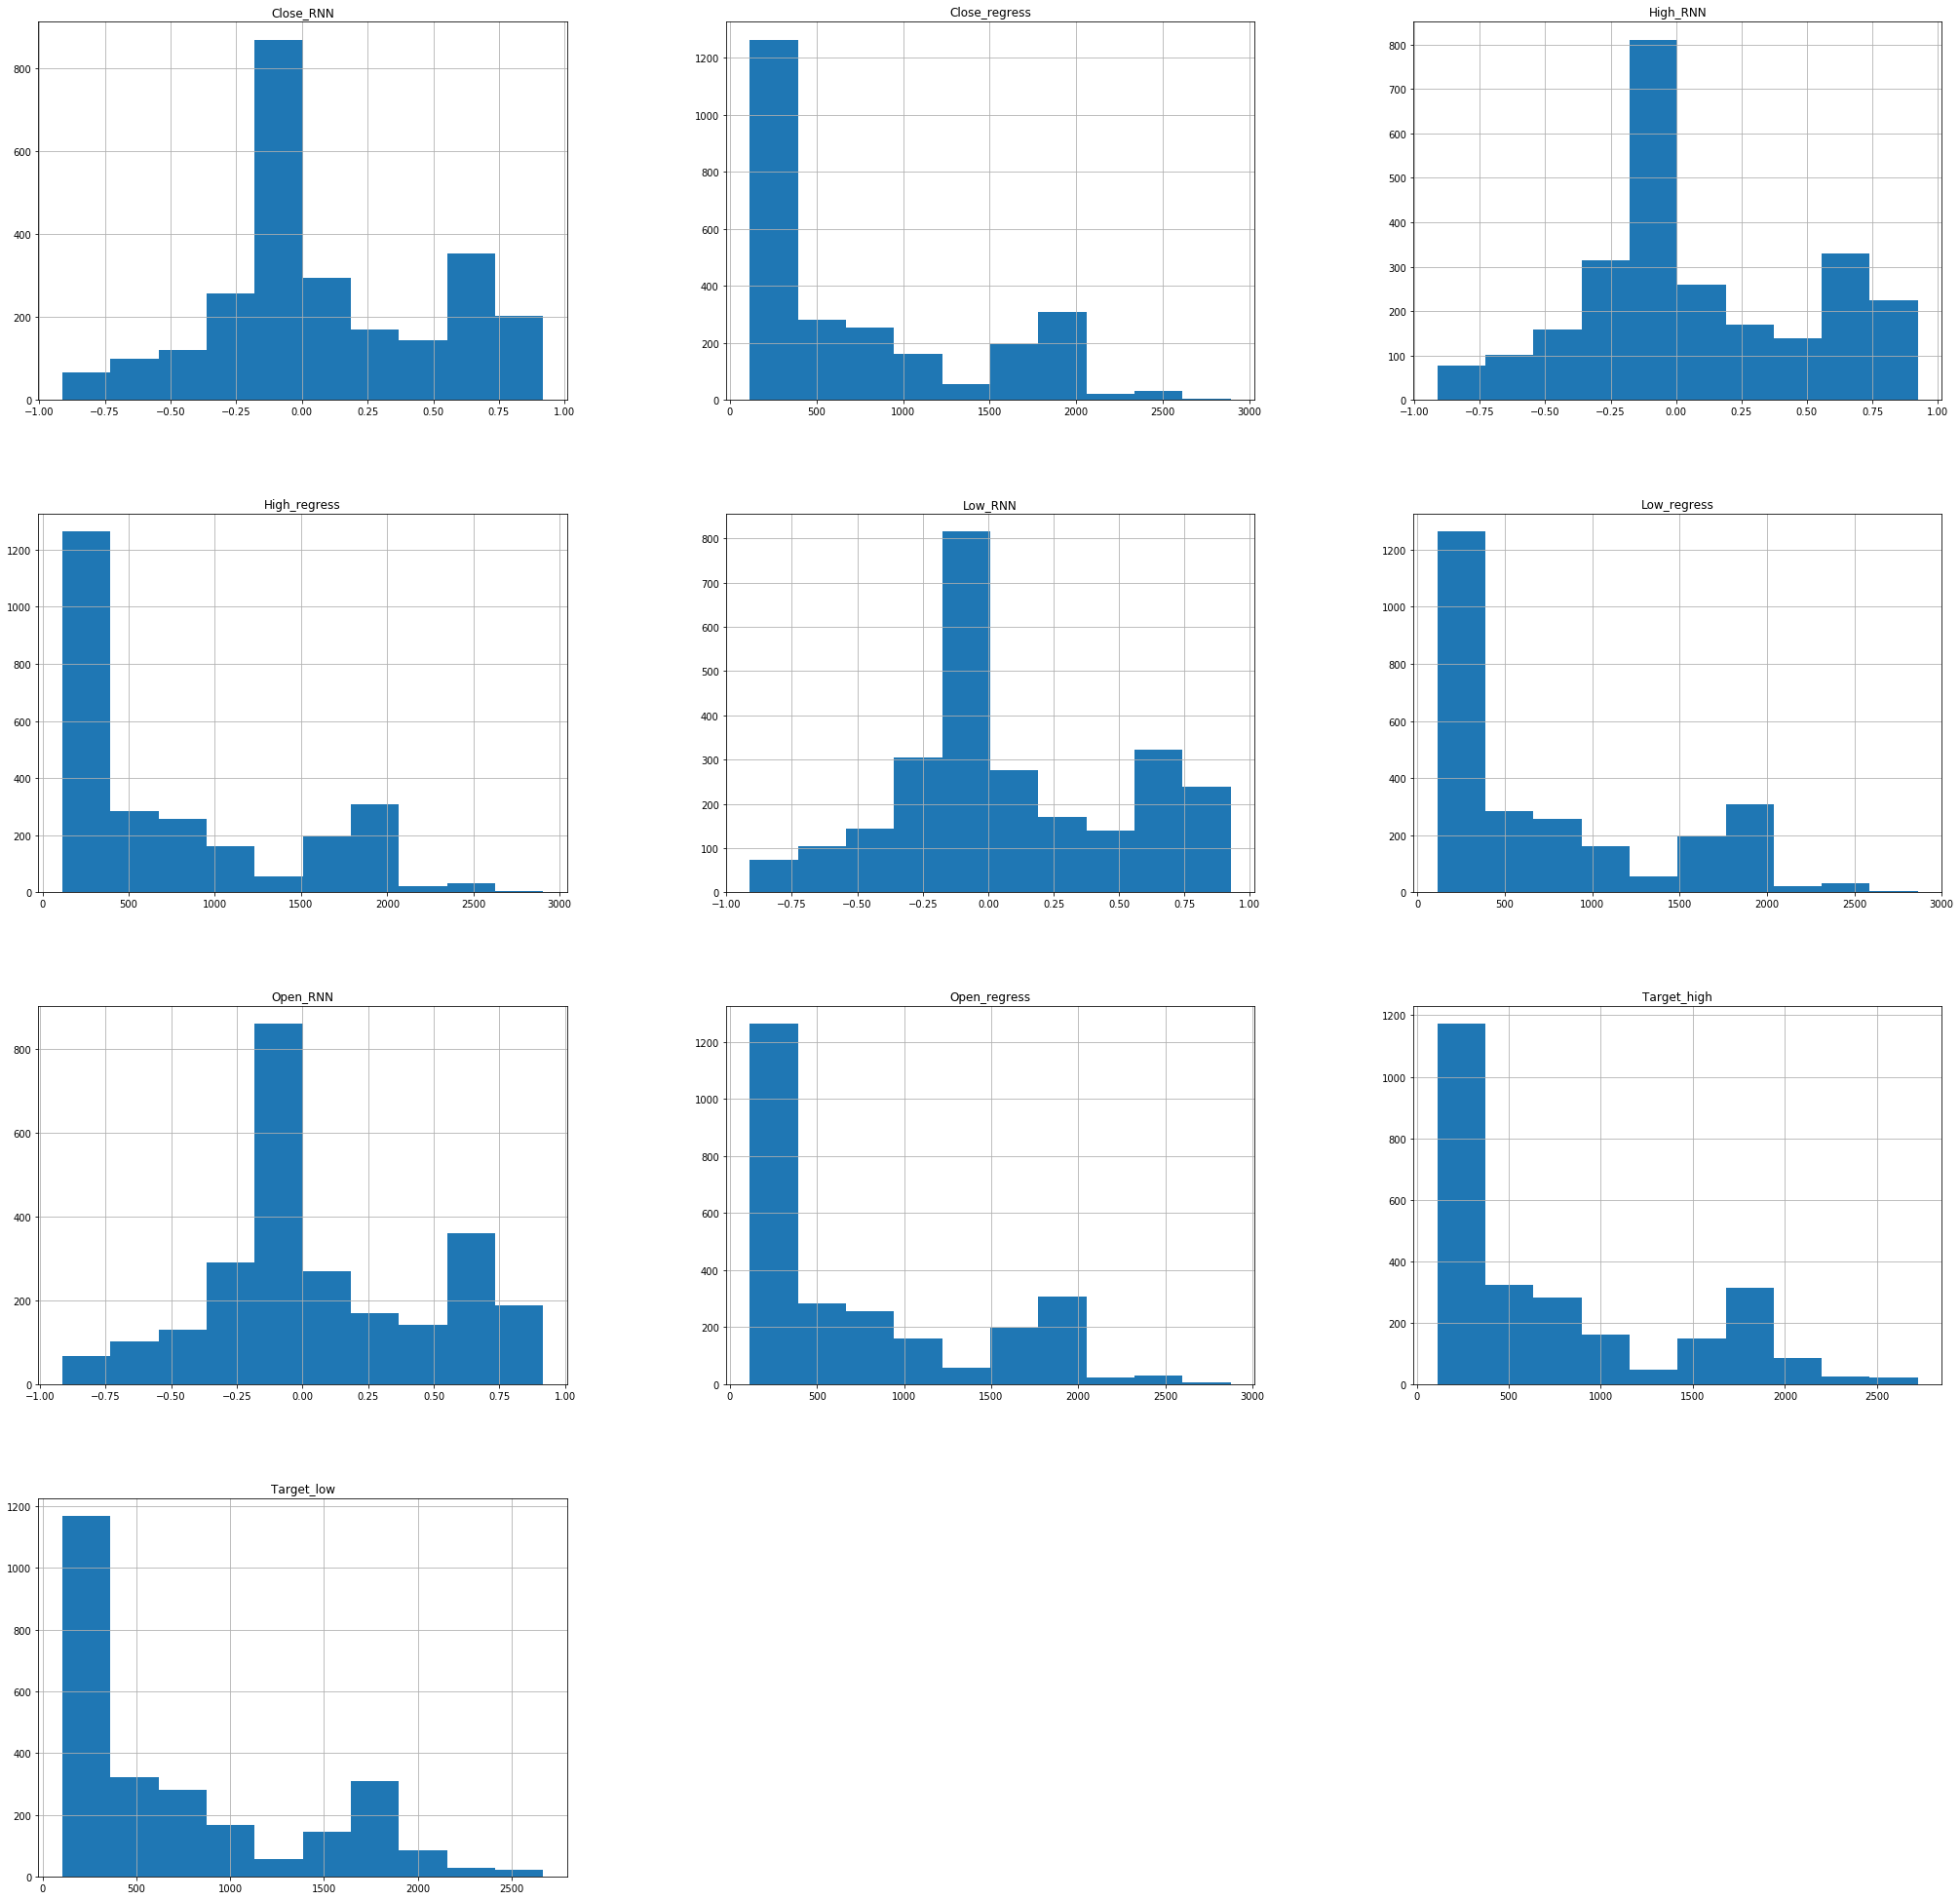

In [560]:
df_main.hist(figsize = (35,35))
plt.show()

In [516]:
y_Df=df_main[['Target_high','Target_low']].values

In [521]:
sc_2 = MinMaxScaler(feature_range = (0, 1))

In [517]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Df, y_Df, test_size=0.3)

In [523]:
X_train_scaled=sc_2.fit_transform(X_train)

In [526]:

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 8, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(2, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [527]:
import tensorflow as tf
model_ANN=model()
callback=tf.keras.callbacks.ModelCheckpoint(filepath='ANN_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=model_ANN.fit(X_train,y_train, epochs = 2000, batch_size = 32,callbacks=[callback])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_61 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_62 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 258       
Total params: 10,978
Trainable params: 10,978
Non-trainable params: 0
_________________________________________________________________
Train on 1810 samples
Epoch 1/2000
1810/1810 [==============================] - 0s 207us/sample - loss: 481.1092 - accuracy: 0.7171 - mean_absolute_error: 481.1092
Epoch 2/2000
1810/1810 [==============================] - 0s 61us/sample - loss: 38

1810/1810 [==============================] - 0s 52us/sample - loss: 34.8571 - accuracy: 1.0000 - mean_absolute_error: 34.8571
Epoch 54/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 36.0819 - accuracy: 1.0000 - mean_absolute_error: 36.0819
Epoch 55/2000
1810/1810 [==============================] - 0s 42us/sample - loss: 35.4723 - accuracy: 0.9890 - mean_absolute_error: 35.4723
Epoch 56/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 35.0254 - accuracy: 1.0000 - mean_absolute_error: 35.0254
Epoch 57/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 35.4870 - accuracy: 1.0000 - mean_absolute_error: 35.4870
Epoch 58/2000
1810/1810 [==============================] - 0s 38us/sample - loss: 36.2244 - accuracy: 1.0000 - mean_absolute_error: 36.2244
Epoch 59/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 35.0548 - accuracy: 1.0000 - mean_absolute_error: 35.0548
Epoch 60/2000
1810/1810 [=========

1810/1810 [==============================] - 0s 58us/sample - loss: 35.3104 - accuracy: 1.0000 - mean_absolute_error: 35.3104
Epoch 112/2000
1810/1810 [==============================] - 0s 62us/sample - loss: 36.7443 - accuracy: 1.0000 - mean_absolute_error: 36.7443
Epoch 113/2000
1810/1810 [==============================] - 0s 56us/sample - loss: 34.9828 - accuracy: 1.0000 - mean_absolute_error: 34.9828
Epoch 114/2000
1810/1810 [==============================] - 0s 58us/sample - loss: 36.3362 - accuracy: 1.0000 - mean_absolute_error: 36.3362
Epoch 115/2000
1810/1810 [==============================] - 0s 56us/sample - loss: 34.5018 - accuracy: 1.0000 - mean_absolute_error: 34.5018
Epoch 116/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 34.6969 - accuracy: 1.0000 - mean_absolute_error: 34.6969
Epoch 117/2000
1810/1810 [==============================] - 0s 60us/sample - loss: 36.7682 - accuracy: 1.0000 - mean_absolute_error: 36.7682
Epoch 118/2000
1810/1810 [==

1810/1810 [==============================] - 0s 52us/sample - loss: 37.0989 - accuracy: 1.0000 - mean_absolute_error: 37.0989
Epoch 170/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.8757 - accuracy: 1.0000 - mean_absolute_error: 34.8757
Epoch 171/2000
1810/1810 [==============================] - 0s 63us/sample - loss: 36.4607 - accuracy: 1.0000 - mean_absolute_error: 36.4607
Epoch 172/2000
1810/1810 [==============================] - 0s 75us/sample - loss: 35.7019 - accuracy: 1.0000 - mean_absolute_error: 35.7019
Epoch 173/2000
1810/1810 [==============================] - 0s 56us/sample - loss: 35.2238 - accuracy: 1.0000 - mean_absolute_error: 35.2238
Epoch 174/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.7732 - accuracy: 1.0000 - mean_absolute_error: 34.7732
Epoch 175/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 35.2904 - accuracy: 1.0000 - mean_absolute_error: 35.2904
Epoch 176/2000
1810/1810 [==

1810/1810 [==============================] - 0s 45us/sample - loss: 34.4520 - accuracy: 1.0000 - mean_absolute_error: 34.4520
Epoch 228/2000
1810/1810 [==============================] - 0s 52us/sample - loss: 34.7241 - accuracy: 1.0000 - mean_absolute_error: 34.7241
Epoch 229/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 35.4352 - accuracy: 1.0000 - mean_absolute_error: 35.4352
Epoch 230/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.8826 - accuracy: 1.0000 - mean_absolute_error: 34.8826
Epoch 231/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 34.1135 - accuracy: 1.0000 - mean_absolute_error: 34.1135
Epoch 232/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 36.1428 - accuracy: 1.0000 - mean_absolute_error: 36.1428
Epoch 233/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 35.9926 - accuracy: 1.0000 - mean_absolute_error: 35.9926
Epoch 234/2000
1810/1810 [==

1810/1810 [==============================] - 0s 55us/sample - loss: 37.4130 - accuracy: 1.0000 - mean_absolute_error: 37.4130
Epoch 286/2000
1810/1810 [==============================] - 0s 54us/sample - loss: 34.4756 - accuracy: 1.0000 - mean_absolute_error: 34.4756
Epoch 287/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.9598 - accuracy: 1.0000 - mean_absolute_error: 34.9598
Epoch 288/2000
1810/1810 [==============================] - 0s 53us/sample - loss: 35.3765 - accuracy: 1.0000 - mean_absolute_error: 35.3765
Epoch 289/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.9506 - accuracy: 1.0000 - mean_absolute_error: 34.9506
Epoch 290/2000
1810/1810 [==============================] - 0s 40us/sample - loss: 34.3217 - accuracy: 1.0000 - mean_absolute_error: 34.3217
Epoch 291/2000
1810/1810 [==============================] - 0s 54us/sample - loss: 33.9922 - accuracy: 1.0000 - mean_absolute_error: 33.9922
Epoch 292/2000
1810/1810 [==

1810/1810 [==============================] - 0s 56us/sample - loss: 35.7830 - accuracy: 1.0000 - mean_absolute_error: 35.7830
Epoch 344/2000
1810/1810 [==============================] - 0s 65us/sample - loss: 34.9411 - accuracy: 1.0000 - mean_absolute_error: 34.9411
Epoch 345/2000
1810/1810 [==============================] - 0s 59us/sample - loss: 36.1099 - accuracy: 1.0000 - mean_absolute_error: 36.1099
Epoch 346/2000
1810/1810 [==============================] - 0s 55us/sample - loss: 35.8534 - accuracy: 1.0000 - mean_absolute_error: 35.8534
Epoch 347/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 35.4925 - accuracy: 1.0000 - mean_absolute_error: 35.4925
Epoch 348/2000
1810/1810 [==============================] - 0s 55us/sample - loss: 34.3958 - accuracy: 1.0000 - mean_absolute_error: 34.3958
Epoch 349/2000
1810/1810 [==============================] - 0s 61us/sample - loss: 37.2646 - accuracy: 1.0000 - mean_absolute_error: 37.2646
Epoch 350/2000
1810/1810 [==

1810/1810 [==============================] - 0s 43us/sample - loss: 35.0921 - accuracy: 1.0000 - mean_absolute_error: 35.0921
Epoch 402/2000
1810/1810 [==============================] - 0s 52us/sample - loss: 33.8683 - accuracy: 1.0000 - mean_absolute_error: 33.8683
Epoch 403/2000
1810/1810 [==============================] - 0s 37us/sample - loss: 35.4062 - accuracy: 1.0000 - mean_absolute_error: 35.4062
Epoch 404/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.9293 - accuracy: 1.0000 - mean_absolute_error: 34.9294
Epoch 405/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.5531 - accuracy: 1.0000 - mean_absolute_error: 34.5531
Epoch 406/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 35.6356 - accuracy: 1.0000 - mean_absolute_error: 35.6356
Epoch 407/2000
1810/1810 [==============================] - 0s 53us/sample - loss: 34.0940 - accuracy: 1.0000 - mean_absolute_error: 34.0940
Epoch 408/2000
1810/1810 [==

1810/1810 [==============================] - 0s 60us/sample - loss: 35.0395 - accuracy: 1.0000 - mean_absolute_error: 35.0395
Epoch 460/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.4540 - accuracy: 1.0000 - mean_absolute_error: 34.4540
Epoch 461/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 35.3751 - accuracy: 1.0000 - mean_absolute_error: 35.3751
Epoch 462/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 36.9303 - accuracy: 1.0000 - mean_absolute_error: 36.9303
Epoch 463/2000
1810/1810 [==============================] - 0s 43us/sample - loss: 36.4095 - accuracy: 1.0000 - mean_absolute_error: 36.4095
Epoch 464/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 33.9552 - accuracy: 1.0000 - mean_absolute_error: 33.9552
Epoch 465/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.3297 - accuracy: 1.0000 - mean_absolute_error: 34.3297
Epoch 466/2000
1810/1810 [==

1810/1810 [==============================] - 0s 49us/sample - loss: 34.5105 - accuracy: 1.0000 - mean_absolute_error: 34.5105
Epoch 518/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.1908 - accuracy: 1.0000 - mean_absolute_error: 34.1908
Epoch 519/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.8522 - accuracy: 1.0000 - mean_absolute_error: 34.8522
Epoch 520/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 36.1356 - accuracy: 1.0000 - mean_absolute_error: 36.1356
Epoch 521/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.1487 - accuracy: 1.0000 - mean_absolute_error: 34.1487
Epoch 522/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 34.3150 - accuracy: 1.0000 - mean_absolute_error: 34.3149
Epoch 523/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.5608 - accuracy: 1.0000 - mean_absolute_error: 34.5608
Epoch 524/2000
1810/1810 [==

1810/1810 [==============================] - 0s 49us/sample - loss: 34.5691 - accuracy: 1.0000 - mean_absolute_error: 34.5691
Epoch 576/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 34.2229 - accuracy: 1.0000 - mean_absolute_error: 34.2229
Epoch 577/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 34.3979 - accuracy: 1.0000 - mean_absolute_error: 34.3979
Epoch 578/2000
1810/1810 [==============================] - 0s 43us/sample - loss: 35.4770 - accuracy: 1.0000 - mean_absolute_error: 35.4770
Epoch 579/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.4984 - accuracy: 1.0000 - mean_absolute_error: 34.4985
Epoch 580/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.6196 - accuracy: 1.0000 - mean_absolute_error: 34.6196
Epoch 581/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 33.9505 - accuracy: 1.0000 - mean_absolute_error: 33.9505
Epoch 582/2000
1810/1810 [==

1810/1810 [==============================] - 0s 47us/sample - loss: 34.8898 - accuracy: 1.0000 - mean_absolute_error: 34.8898
Epoch 634/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 37.2523 - accuracy: 1.0000 - mean_absolute_error: 37.2523
Epoch 635/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.6501 - accuracy: 1.0000 - mean_absolute_error: 34.6501
Epoch 636/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.0640 - accuracy: 1.0000 - mean_absolute_error: 34.0640
Epoch 637/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 35.9416 - accuracy: 1.0000 - mean_absolute_error: 35.9417
Epoch 638/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.8586 - accuracy: 1.0000 - mean_absolute_error: 34.8586
Epoch 639/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 35.1023 - accuracy: 1.0000 - mean_absolute_error: 35.1023
Epoch 640/2000
1810/1810 [==

1810/1810 [==============================] - 0s 47us/sample - loss: 34.4215 - accuracy: 1.0000 - mean_absolute_error: 34.4215
Epoch 692/2000
1810/1810 [==============================] - 0s 57us/sample - loss: 37.2586 - accuracy: 1.0000 - mean_absolute_error: 37.2586
Epoch 693/2000
1810/1810 [==============================] - 0s 61us/sample - loss: 34.9506 - accuracy: 1.0000 - mean_absolute_error: 34.9506
Epoch 694/2000
1810/1810 [==============================] - 0s 60us/sample - loss: 35.0671 - accuracy: 1.0000 - mean_absolute_error: 35.0671
Epoch 695/2000
1810/1810 [==============================] - 0s 55us/sample - loss: 34.2638 - accuracy: 1.0000 - mean_absolute_error: 34.2638
Epoch 696/2000
1810/1810 [==============================] - 0s 56us/sample - loss: 35.5918 - accuracy: 1.0000 - mean_absolute_error: 35.5918
Epoch 697/2000
1810/1810 [==============================] - 0s 54us/sample - loss: 35.4015 - accuracy: 1.0000 - mean_absolute_error: 35.4015
Epoch 698/2000
1810/1810 [==

1810/1810 [==============================] - 0s 45us/sample - loss: 34.3592 - accuracy: 1.0000 - mean_absolute_error: 34.3592
Epoch 750/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 34.1440 - accuracy: 1.0000 - mean_absolute_error: 34.1440
Epoch 751/2000
1810/1810 [==============================] - 0s 38us/sample - loss: 34.3426 - accuracy: 1.0000 - mean_absolute_error: 34.3425
Epoch 752/2000
1810/1810 [==============================] - 0s 43us/sample - loss: 34.2047 - accuracy: 1.0000 - mean_absolute_error: 34.2047
Epoch 753/2000
1810/1810 [==============================] - 0s 52us/sample - loss: 34.4201 - accuracy: 1.0000 - mean_absolute_error: 34.4201
Epoch 754/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.3156 - accuracy: 1.0000 - mean_absolute_error: 34.3156
Epoch 755/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.1604 - accuracy: 1.0000 - mean_absolute_error: 34.1604
Epoch 756/2000
1810/1810 [==

1810/1810 [==============================] - 0s 50us/sample - loss: 34.4292 - accuracy: 1.0000 - mean_absolute_error: 34.4292
Epoch 808/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 34.8262 - accuracy: 1.0000 - mean_absolute_error: 34.8262
Epoch 809/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.3826 - accuracy: 1.0000 - mean_absolute_error: 34.3826
Epoch 810/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.5792 - accuracy: 1.0000 - mean_absolute_error: 34.5792
Epoch 811/2000
1810/1810 [==============================] - 0s 54us/sample - loss: 34.5237 - accuracy: 1.0000 - mean_absolute_error: 34.5237
Epoch 812/2000
1810/1810 [==============================] - 0s 41us/sample - loss: 34.8215 - accuracy: 1.0000 - mean_absolute_error: 34.8215
Epoch 813/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.1260 - accuracy: 1.0000 - mean_absolute_error: 34.1260
Epoch 814/2000
1810/1810 [==

1810/1810 [==============================] - 0s 51us/sample - loss: 35.2462 - accuracy: 1.0000 - mean_absolute_error: 35.2462
Epoch 866/2000
1810/1810 [==============================] - 0s 43us/sample - loss: 35.3051 - accuracy: 1.0000 - mean_absolute_error: 35.3051
Epoch 867/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.7001 - accuracy: 1.0000 - mean_absolute_error: 34.7001
Epoch 868/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.3282 - accuracy: 1.0000 - mean_absolute_error: 34.3282
Epoch 869/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 35.9110 - accuracy: 1.0000 - mean_absolute_error: 35.9110
Epoch 870/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.7955 - accuracy: 1.0000 - mean_absolute_error: 34.7955
Epoch 871/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 35.3902 - accuracy: 1.0000 - mean_absolute_error: 35.3902
Epoch 872/2000
1810/1810 [==

1810/1810 [==============================] - 0s 52us/sample - loss: 34.3573 - accuracy: 1.0000 - mean_absolute_error: 34.3573
Epoch 924/2000
1810/1810 [==============================] - 0s 53us/sample - loss: 34.5134 - accuracy: 1.0000 - mean_absolute_error: 34.5134
Epoch 925/2000
1810/1810 [==============================] - 0s 37us/sample - loss: 34.7038 - accuracy: 1.0000 - mean_absolute_error: 34.7038
Epoch 926/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.8732 - accuracy: 1.0000 - mean_absolute_error: 34.8732
Epoch 927/2000
1810/1810 [==============================] - 0s 52us/sample - loss: 34.7127 - accuracy: 1.0000 - mean_absolute_error: 34.7126
Epoch 928/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.3983 - accuracy: 1.0000 - mean_absolute_error: 34.3983
Epoch 929/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 33.8517 - accuracy: 1.0000 - mean_absolute_error: 33.8517
Epoch 930/2000
1810/1810 [==

1810/1810 [==============================] - 0s 45us/sample - loss: 34.0770 - accuracy: 1.0000 - mean_absolute_error: 34.0770
Epoch 982/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.0549 - accuracy: 1.0000 - mean_absolute_error: 34.0549
Epoch 983/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 35.1352 - accuracy: 1.0000 - mean_absolute_error: 35.1352
Epoch 984/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 35.4637 - accuracy: 1.0000 - mean_absolute_error: 35.4637
Epoch 985/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.8801 - accuracy: 1.0000 - mean_absolute_error: 34.8801
Epoch 986/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 34.7236 - accuracy: 1.0000 - mean_absolute_error: 34.7236
Epoch 987/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.8191 - accuracy: 1.0000 - mean_absolute_error: 34.8191
Epoch 988/2000
1810/1810 [==

1810/1810 [==============================] - 0s 44us/sample - loss: 34.7036 - accuracy: 1.0000 - mean_absolute_error: 34.7036
Epoch 1039/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.9496 - accuracy: 1.0000 - mean_absolute_error: 34.9496
Epoch 1040/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.6923 - accuracy: 1.0000 - mean_absolute_error: 34.6923
Epoch 1041/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.2446 - accuracy: 1.0000 - mean_absolute_error: 34.2446
Epoch 1042/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 34.4818 - accuracy: 1.0000 - mean_absolute_error: 34.4818
Epoch 1043/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.4465 - accuracy: 1.0000 - mean_absolute_error: 34.4465
Epoch 1044/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.1278 - accuracy: 1.0000 - mean_absolute_error: 34.1278
Epoch 1045/2000
1810/1

1810/1810 [==============================] - 0s 48us/sample - loss: 34.9642 - accuracy: 1.0000 - mean_absolute_error: 34.9642
Epoch 1096/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 35.2173 - accuracy: 1.0000 - mean_absolute_error: 35.2173
Epoch 1097/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.6109 - accuracy: 1.0000 - mean_absolute_error: 34.6109
Epoch 1098/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 35.2482 - accuracy: 1.0000 - mean_absolute_error: 35.2482
Epoch 1099/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.8713 - accuracy: 1.0000 - mean_absolute_error: 34.8713
Epoch 1100/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.9635 - accuracy: 1.0000 - mean_absolute_error: 34.9635
Epoch 1101/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 33.9507 - accuracy: 1.0000 - mean_absolute_error: 33.9507
Epoch 1102/2000
1810/1

1810/1810 [==============================] - 0s 55us/sample - loss: 34.3336 - accuracy: 1.0000 - mean_absolute_error: 34.3336
Epoch 1153/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.2851 - accuracy: 1.0000 - mean_absolute_error: 34.2851
Epoch 1154/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.1940 - accuracy: 1.0000 - mean_absolute_error: 34.1940
Epoch 1155/2000
1810/1810 [==============================] - 0s 43us/sample - loss: 34.6900 - accuracy: 1.0000 - mean_absolute_error: 34.6900
Epoch 1156/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.4765 - accuracy: 1.0000 - mean_absolute_error: 34.4765
Epoch 1157/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.4598 - accuracy: 1.0000 - mean_absolute_error: 34.4598
Epoch 1158/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 35.3036 - accuracy: 1.0000 - mean_absolute_error: 35.3036
Epoch 1159/2000
1810/1

1810/1810 [==============================] - 0s 46us/sample - loss: 34.0821 - accuracy: 1.0000 - mean_absolute_error: 34.0821
Epoch 1210/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.5010 - accuracy: 1.0000 - mean_absolute_error: 34.5009
Epoch 1211/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 35.4103 - accuracy: 1.0000 - mean_absolute_error: 35.4103
Epoch 1212/2000
1810/1810 [==============================] - 0s 52us/sample - loss: 35.0825 - accuracy: 1.0000 - mean_absolute_error: 35.0825
Epoch 1213/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.3663 - accuracy: 1.0000 - mean_absolute_error: 34.3663
Epoch 1214/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 34.0642 - accuracy: 1.0000 - mean_absolute_error: 34.0642
Epoch 1215/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 35.2093 - accuracy: 1.0000 - mean_absolute_error: 35.2093
Epoch 1216/2000
1810/1

1810/1810 [==============================] - 0s 64us/sample - loss: 34.3607 - accuracy: 1.0000 - mean_absolute_error: 34.3607
Epoch 1267/2000
1810/1810 [==============================] - 0s 59us/sample - loss: 34.8056 - accuracy: 1.0000 - mean_absolute_error: 34.8056
Epoch 1268/2000
1810/1810 [==============================] - 0s 57us/sample - loss: 33.9077 - accuracy: 1.0000 - mean_absolute_error: 33.9077
Epoch 1269/2000
1810/1810 [==============================] - 0s 55us/sample - loss: 34.5549 - accuracy: 1.0000 - mean_absolute_error: 34.5549
Epoch 1270/2000
1810/1810 [==============================] - 0s 53us/sample - loss: 34.5763 - accuracy: 1.0000 - mean_absolute_error: 34.5763
Epoch 1271/2000
1810/1810 [==============================] - 0s 41us/sample - loss: 34.1185 - accuracy: 1.0000 - mean_absolute_error: 34.1185
Epoch 1272/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.6411 - accuracy: 1.0000 - mean_absolute_error: 34.6411
Epoch 1273/2000
1810/1

1810/1810 [==============================] - 0s 49us/sample - loss: 36.6782 - accuracy: 1.0000 - mean_absolute_error: 36.6782
Epoch 1324/2000
1810/1810 [==============================] - 0s 40us/sample - loss: 34.4297 - accuracy: 1.0000 - mean_absolute_error: 34.4297
Epoch 1325/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.8894 - accuracy: 1.0000 - mean_absolute_error: 34.8894
Epoch 1326/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 33.9836 - accuracy: 1.0000 - mean_absolute_error: 33.9836
Epoch 1327/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.5807 - accuracy: 1.0000 - mean_absolute_error: 34.5807
Epoch 1328/2000
1810/1810 [==============================] - 0s 40us/sample - loss: 34.1184 - accuracy: 1.0000 - mean_absolute_error: 34.1184
Epoch 1329/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.4398 - accuracy: 1.0000 - mean_absolute_error: 34.4398
Epoch 1330/2000
1810/1

1810/1810 [==============================] - 0s 47us/sample - loss: 35.0860 - accuracy: 1.0000 - mean_absolute_error: 35.0860
Epoch 1381/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.8438 - accuracy: 1.0000 - mean_absolute_error: 34.8438
Epoch 1382/2000
1810/1810 [==============================] - 0s 38us/sample - loss: 34.4358 - accuracy: 1.0000 - mean_absolute_error: 34.4358
Epoch 1383/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 33.9899 - accuracy: 1.0000 - mean_absolute_error: 33.9899
Epoch 1384/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.8701 - accuracy: 1.0000 - mean_absolute_error: 34.8701
Epoch 1385/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.6639 - accuracy: 1.0000 - mean_absolute_error: 34.6639
Epoch 1386/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 33.9749 - accuracy: 1.0000 - mean_absolute_error: 33.9749
Epoch 1387/2000
1810/1

1810/1810 [==============================] - 0s 45us/sample - loss: 34.2359 - accuracy: 1.0000 - mean_absolute_error: 34.2359
Epoch 1438/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.3560 - accuracy: 1.0000 - mean_absolute_error: 34.3560
Epoch 1439/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.1462 - accuracy: 1.0000 - mean_absolute_error: 34.1462
Epoch 1440/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 34.4900 - accuracy: 1.0000 - mean_absolute_error: 34.4900
Epoch 1441/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.9089 - accuracy: 1.0000 - mean_absolute_error: 34.9089
Epoch 1442/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.7638 - accuracy: 1.0000 - mean_absolute_error: 34.7638
Epoch 1443/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 34.3854 - accuracy: 1.0000 - mean_absolute_error: 34.3854
Epoch 1444/2000
1810/1

1810/1810 [==============================] - 0s 46us/sample - loss: 35.0357 - accuracy: 1.0000 - mean_absolute_error: 35.0357
Epoch 1495/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.3059 - accuracy: 1.0000 - mean_absolute_error: 34.3059
Epoch 1496/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.0318 - accuracy: 1.0000 - mean_absolute_error: 34.0318
Epoch 1497/2000
1810/1810 [==============================] - 0s 43us/sample - loss: 34.6562 - accuracy: 1.0000 - mean_absolute_error: 34.6562
Epoch 1498/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.5937 - accuracy: 1.0000 - mean_absolute_error: 34.5937
Epoch 1499/2000
1810/1810 [==============================] - 0s 40us/sample - loss: 33.8775 - accuracy: 1.0000 - mean_absolute_error: 33.8775
Epoch 1500/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.0306 - accuracy: 1.0000 - mean_absolute_error: 34.0306
Epoch 1501/2000
1810/1

1810/1810 [==============================] - 0s 53us/sample - loss: 34.7169 - accuracy: 1.0000 - mean_absolute_error: 34.7169
Epoch 1552/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.3099 - accuracy: 1.0000 - mean_absolute_error: 34.3099
Epoch 1553/2000
1810/1810 [==============================] - 0s 41us/sample - loss: 34.0450 - accuracy: 1.0000 - mean_absolute_error: 34.0450
Epoch 1554/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.7112 - accuracy: 1.0000 - mean_absolute_error: 34.7112
Epoch 1555/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.6002 - accuracy: 1.0000 - mean_absolute_error: 34.6002
Epoch 1556/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.1769 - accuracy: 1.0000 - mean_absolute_error: 34.1769
Epoch 1557/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.2988 - accuracy: 1.0000 - mean_absolute_error: 34.2988
Epoch 1558/2000
1810/1

1810/1810 [==============================] - 0s 51us/sample - loss: 33.9720 - accuracy: 1.0000 - mean_absolute_error: 33.9720
Epoch 1609/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.6079 - accuracy: 1.0000 - mean_absolute_error: 34.6079
Epoch 1610/2000
1810/1810 [==============================] - 0s 51us/sample - loss: 33.8172 - accuracy: 1.0000 - mean_absolute_error: 33.8172
Epoch 1611/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 33.9307 - accuracy: 1.0000 - mean_absolute_error: 33.9307
Epoch 1612/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.3711 - accuracy: 1.0000 - mean_absolute_error: 34.3711
Epoch 1613/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 33.9198 - accuracy: 1.0000 - mean_absolute_error: 33.9198
Epoch 1614/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.7271 - accuracy: 1.0000 - mean_absolute_error: 34.7271
Epoch 1615/2000
1810/1

1810/1810 [==============================] - 0s 51us/sample - loss: 35.6130 - accuracy: 1.0000 - mean_absolute_error: 35.6130
Epoch 1666/2000
1810/1810 [==============================] - 0s 38us/sample - loss: 33.8229 - accuracy: 1.0000 - mean_absolute_error: 33.8230
Epoch 1667/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 33.9050 - accuracy: 1.0000 - mean_absolute_error: 33.9050
Epoch 1668/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 35.6608 - accuracy: 1.0000 - mean_absolute_error: 35.6608
Epoch 1669/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.2005 - accuracy: 1.0000 - mean_absolute_error: 34.2005
Epoch 1670/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.2731 - accuracy: 1.0000 - mean_absolute_error: 34.2731
Epoch 1671/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 34.7499 - accuracy: 1.0000 - mean_absolute_error: 34.7499
Epoch 1672/2000
1810/1

1810/1810 [==============================] - 0s 48us/sample - loss: 35.3891 - accuracy: 1.0000 - mean_absolute_error: 35.3891
Epoch 1723/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 35.0809 - accuracy: 1.0000 - mean_absolute_error: 35.0809
Epoch 1724/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 33.9146 - accuracy: 1.0000 - mean_absolute_error: 33.9146
Epoch 1725/2000
1810/1810 [==============================] - 0s 52us/sample - loss: 34.3645 - accuracy: 1.0000 - mean_absolute_error: 34.3645
Epoch 1726/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.1474 - accuracy: 1.0000 - mean_absolute_error: 34.1474
Epoch 1727/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.4332 - accuracy: 1.0000 - mean_absolute_error: 34.4332
Epoch 1728/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.8250 - accuracy: 1.0000 - mean_absolute_error: 34.8250
Epoch 1729/2000
1810/1

1810/1810 [==============================] - 0s 51us/sample - loss: 35.1585 - accuracy: 1.0000 - mean_absolute_error: 35.1585
Epoch 1780/2000
1810/1810 [==============================] - 0s 40us/sample - loss: 33.9862 - accuracy: 1.0000 - mean_absolute_error: 33.9862
Epoch 1781/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 35.4223 - accuracy: 1.0000 - mean_absolute_error: 35.4223
Epoch 1782/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.0538 - accuracy: 1.0000 - mean_absolute_error: 34.0538
Epoch 1783/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.1183 - accuracy: 1.0000 - mean_absolute_error: 34.1183
Epoch 1784/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.9004 - accuracy: 1.0000 - mean_absolute_error: 34.9004
Epoch 1785/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.5645 - accuracy: 1.0000 - mean_absolute_error: 34.5645
Epoch 1786/2000
1810/1

1810/1810 [==============================] - 0s 52us/sample - loss: 34.5174 - accuracy: 1.0000 - mean_absolute_error: 34.5174
Epoch 1837/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 34.7932 - accuracy: 1.0000 - mean_absolute_error: 34.7932
Epoch 1838/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.4315 - accuracy: 1.0000 - mean_absolute_error: 34.4315
Epoch 1839/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.9135 - accuracy: 1.0000 - mean_absolute_error: 34.9135
Epoch 1840/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.1812 - accuracy: 1.0000 - mean_absolute_error: 34.1812
Epoch 1841/2000
1810/1810 [==============================] - 0s 46us/sample - loss: 34.5554 - accuracy: 1.0000 - mean_absolute_error: 34.5554
Epoch 1842/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.3682 - accuracy: 1.0000 - mean_absolute_error: 34.3682
Epoch 1843/2000
1810/1

1810/1810 [==============================] - 0s 61us/sample - loss: 34.4467 - accuracy: 1.0000 - mean_absolute_error: 34.4467
Epoch 1894/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 34.4187 - accuracy: 1.0000 - mean_absolute_error: 34.4188
Epoch 1895/2000
1810/1810 [==============================] - 0s 73us/sample - loss: 34.0559 - accuracy: 1.0000 - mean_absolute_error: 34.0560
Epoch 1896/2000
1810/1810 [==============================] - 0s 57us/sample - loss: 34.2302 - accuracy: 1.0000 - mean_absolute_error: 34.2302
Epoch 1897/2000
1810/1810 [==============================] - 0s 44us/sample - loss: 34.5474 - accuracy: 1.0000 - mean_absolute_error: 34.5474
Epoch 1898/2000
1810/1810 [==============================] - 0s 48us/sample - loss: 34.2176 - accuracy: 1.0000 - mean_absolute_error: 34.2176
Epoch 1899/2000
1810/1810 [==============================] - 0s 49us/sample - loss: 34.0003 - accuracy: 1.0000 - mean_absolute_error: 34.0003
Epoch 1900/2000
1810/1

1810/1810 [==============================] - 0s 43us/sample - loss: 34.4236 - accuracy: 1.0000 - mean_absolute_error: 34.4236
Epoch 1951/2000
1810/1810 [==============================] - 0s 55us/sample - loss: 34.4079 - accuracy: 1.0000 - mean_absolute_error: 34.4079
Epoch 1952/2000
1810/1810 [==============================] - 0s 45us/sample - loss: 35.4219 - accuracy: 1.0000 - mean_absolute_error: 35.4219
Epoch 1953/2000
1810/1810 [==============================] - 0s 50us/sample - loss: 35.1847 - accuracy: 1.0000 - mean_absolute_error: 35.1847
Epoch 1954/2000
1810/1810 [==============================] - 0s 40us/sample - loss: 34.1076 - accuracy: 1.0000 - mean_absolute_error: 34.1076
Epoch 1955/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 35.0591 - accuracy: 1.0000 - mean_absolute_error: 35.0591
Epoch 1956/2000
1810/1810 [==============================] - 0s 47us/sample - loss: 34.5713 - accuracy: 1.0000 - mean_absolute_error: 34.5713
Epoch 1957/2000
1810/1

In [528]:
X_test_scaled=sc_2.transform(X_test)

In [530]:
y_pred=model_ANN.predict(X_test)

In [531]:
y_pred

array([[788.94354, 776.93787],
       [856.6491 , 843.7177 ],
       [428.75418, 421.67236],
       ...,
       [319.30362, 313.71814],
       [130.0816 , 127.0829 ],
       [350.7245 , 344.70947]], dtype=float32)

In [532]:
y_test

array([[822.        , 811.67999268],
       [848.46002197, 843.75      ],
       [431.3500061 , 424.75      ],
       ...,
       [372.83999634, 358.3999939 ],
       [111.69000244, 106.69999695],
       [374.41000366, 367.20001221]])

In [533]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,2):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

In [534]:
df_res=pd.DataFrame(list(zip(y_pred_mod[0],y_pred_mod[1],y_test_mod[0],y_test_mod[1])),columns=['Pred_high','Pred_low','Actual_high','Actual_low'])

In [535]:
df_res.head()

,Pred_high,Pred_low,Actual_high,Actual_low
0,788.943542,776.937866,822.000000,811.679993
1,856.649109,843.717712,848.460022,843.750000
2,428.754181,421.672363,431.350006,424.750000
3,500.153961,492.096252,540.440002,529.359985
4,393.484528,386.884949,638.059998,597.549988


In [544]:
df_res.to_csv('Results.csv',index=False)

In [553]:
df_res_2=df_res[500:600]

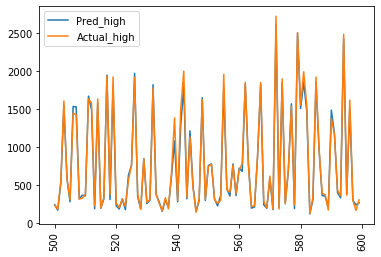

In [547]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_high'], label="Pred_high")
ax1.plot(df_res_2.index, df_res_2['Actual_high'], label="Actual_high")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

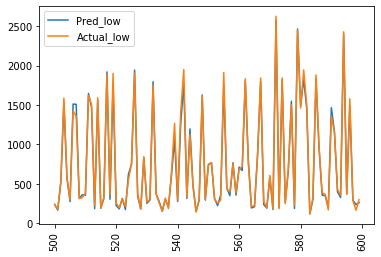

In [554]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_low'], label="Pred_low")
ax1.plot(df_res_2.index, df_res_2['Actual_low'], label="Actual_low")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

In [555]:
df_res_2=df_res[200:300]

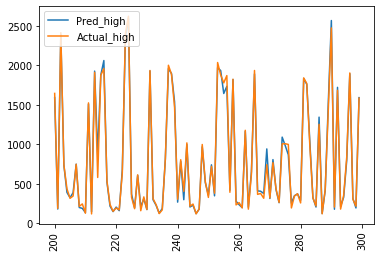

In [549]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_high'], label="Pred_high")
ax1.plot(df_res_2.index, df_res_2['Actual_high'], label="Actual_high")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

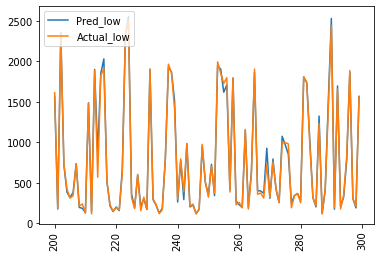

In [556]:
import matplotlib.pyplot as plt
	

ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_res_2.index, df_res_2['Pred_low'], label="Pred_low")
ax1.plot(df_res_2.index, df_res_2['Actual_low'], label="Actual_low")

plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

### Low_ANN

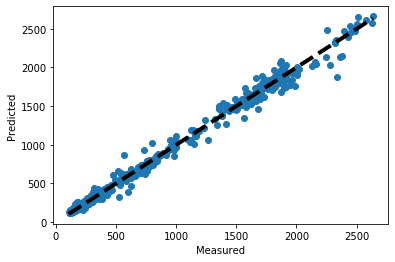

In [550]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### High_ANN

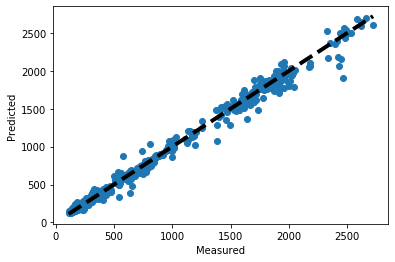

In [551]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()